In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
from sklearn.linear_model import LinearRegression
import seaborn as sns
from IPython.display import display
import statsmodels.api as sm
import calendar
from scipy.stats import chi2_contingency



In [2]:
#import the dataset 
df = pd.read_csv("/Users/riccardo.soleo/Desktop/ADM HW2/ADM-HW2-final/steam_reviews.csv")

### ***[RQ1]Exploratory Data Analysis (EDA). What can you say about our dataset?***


In [3]:
#see the shape of the dataset
print(df.shape)


(21747371, 23)


The dataset contains 21,747,371 rows and 23 columns. Each row represents a review on steam, and each column provides a specific feature related to either the reviewed game or the user who posted the review.

In [4]:
#see the columns and their type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21747371 entries, 0 to 21747370
Data columns (total 23 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   Unnamed: 0                      int64  
 1   app_id                          int64  
 2   app_name                        object 
 3   review_id                       int64  
 4   language                        object 
 5   review                          object 
 6   timestamp_created               int64  
 7   timestamp_updated               int64  
 8   recommended                     bool   
 9   votes_helpful                   int64  
 10  votes_funny                     int64  
 11  weighted_vote_score             float64
 12  comment_count                   int64  
 13  steam_purchase                  bool   
 14  received_for_free               bool   
 15  written_during_early_access     bool   
 16  author.steamid                  int64  
 17  author.num_games_owned   

The dataset features a comprehensive collection of user reviews for various games on Steam.  It includes details for each review and game, such as language, review text, and timestamps indicating when the reviews were created or updated. There are Boolean fields that show whether a review is positive and whether the game was purchased or received for free.  Reviewer information is also included, providing details like user ID, the number of games owned, and the number of reviews written, along with various metrics on playtime (valuable for evaluating user experience). Additionally, the dataset contains data on helpful and funny votes, as well as comment counts, which reflect the impact and popularity of each review.



In [5]:
df.head()

,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,0,292030,The Witcher 3: Wild Hunt,85185598,schinese,不玩此生遗憾，RPG游戏里的天花板，太吸引人了,1611381629,1611381629,True,0,...,True,False,False,76561199095369542,6,2,1909.0,1448.0,1909.0,1.611343e+09
1,1,292030,The Witcher 3: Wild Hunt,85185250,schinese,拔DIAO无情打桩机--杰洛特!!!,1611381030,1611381030,True,0,...,True,False,False,76561198949504115,30,10,2764.0,2743.0,2674.0,1.611386e+09
2,2,292030,The Witcher 3: Wild Hunt,85185111,schinese,巫师3NB,1611380800,1611380800,True,0,...,True,False,False,76561199090098988,5,1,1061.0,1061.0,1060.0,1.611384e+09
3,3,292030,The Witcher 3: Wild Hunt,85184605,english,"One of the best RPG's of all time, worthy of a...",1611379970,1611379970,True,0,...,True,False,False,76561199054755373,5,3,5587.0,3200.0,5524.0,1.611384e+09
4,4,292030,The Witcher 3: Wild Hunt,85184287,schinese,大作,1611379427,1611379427,True,0,...,True,False,False,76561199028326951,7,4,217.0,42.0,217.0,1.610788e+09


In [6]:
#shows the number of unique games reviewed 
n_games=df['app_id'].nunique()
n_games1=df['app_name'].nunique()
n_users=df['author.steamid'].nunique()
print(n_games1,n_games)
print(n_users)


315 315
12406560


315 games reviewed by 12.406.560 users, in average each player wrote about 1.75 reviews.

In [7]:
#see the missing values
df.isnull().sum()

Unnamed: 0                            0
app_id                                0
app_name                              0
review_id                             0
language                              0
review                            33748
timestamp_created                     0
timestamp_updated                     0
recommended                           0
votes_helpful                         0
votes_funny                           0
weighted_vote_score                   0
comment_count                         0
steam_purchase                        0
received_for_free                     0
written_during_early_access           0
author.steamid                        0
author.num_games_owned                0
author.num_reviews                    0
author.playtime_forever               2
author.playtime_last_two_weeks        2
author.playtime_at_review         25682
author.last_played                    2
dtype: int64

In [8]:
(df['author.playtime_at_review'] == 0).any()

np.False_

The 'review' field has 33,748 missing values, indicating the number of players who reviewed a game (on Steam, the review score is binary: recommended or not recommended) without adding a comment. We also found 25,682 users who reviewed a game without having played it (since there are no values of 0, the missing values likely represent players who reviewed it without playing). We can fill these missing values with 0. Additionally, there are 2 users who left a review without playing even a single minute of the game; we might consider removing these rows from the dataset.

In [9]:
#remove the 2 players who didn't play 
df.dropna(subset=['author.playtime_forever'], inplace=True)


In [10]:
#fill nan values at column author playtime with 0 values.
df['author.playtime_at_review'] = df['author.playtime_at_review'].fillna(0)

28
language
english       44.306210
schinese      17.312287
russian       10.800847
brazilian      3.851151
spanish        3.739855
german         3.460630
turkish        2.923885
koreana        2.821638
french         2.491111
polish         2.278570
tchinese       1.003354
czech          0.616075
italian        0.612980
thai           0.586292
japanese       0.375926
portuguese     0.374234
swedish        0.368900
dutch          0.356618
hungarian      0.326481
latam          0.322352
danish         0.257112
finnish        0.251580
norwegian      0.169202
romanian       0.150501
ukrainian      0.097341
greek          0.066546
bulgarian      0.048070
vietnamese     0.030257
Name: proportion, dtype: float64


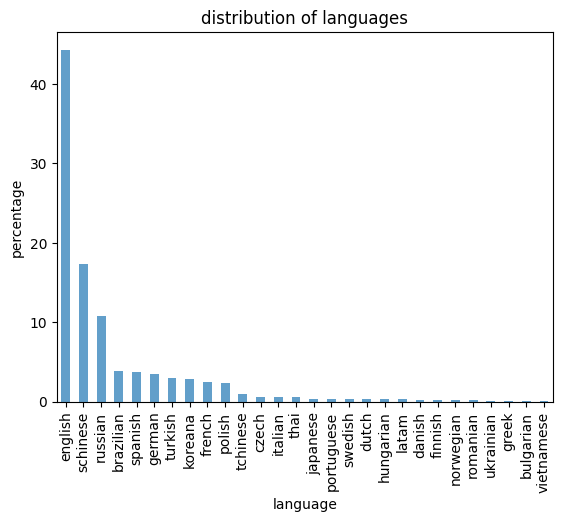

In [11]:
#see the distribution of language
n_lingue=df['language'].nunique()
print(n_lingue)
frequenza_lingue = df['language'].value_counts(normalize=True)*100
print(frequenza_lingue)
(df['language'].value_counts(normalize=True)*100).plot(kind='bar', alpha=0.7)
plt.xlabel('language')
plt.ylabel('percentage')
plt.title('distribution of languages')
plt.show()

The reviews are written in 28 different languages. Specifically, around 40% are in English, 17% in Chinese (Mandarin), and 10% in Russian. The other languages appear with lower frequencies.

### ***[RQ2] Let's explore the dataset by analyzing the distribution of reviews across different applications.***

***Identify which applications have the highest and lowest number of reviews.***

In [12]:
print(f"game with the most reviews: {df['app_name'].value_counts().idxmax()} ({df['app_name'].value_counts().max()} reviews)")
print(f"game with the lowest reviews: {df['app_name'].value_counts().idxmin()} ({df['app_name'].value_counts().min()} reviews)")

game with the most reviews: PLAYERUNKNOWN'S BATTLEGROUNDS (1644255 reviews)
game with the lowest reviews: Neon Hardcorps (200 reviews)


***Plot the number of reviews for each application in descending order. What insights can you draw from the plot?***

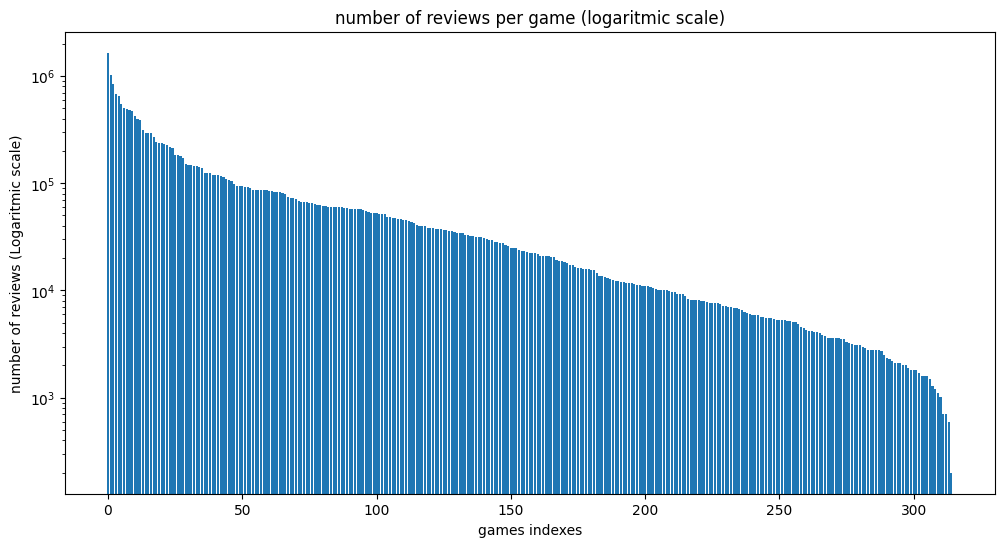

In [13]:
#counts the number of reviews for each game
review_counts = df['app_name'].value_counts()

#plot
plt.figure(figsize=(12,6))
plt.bar(range(len(review_counts)), review_counts)
#we can apply the logaritmic scale because the range of the frequencies is wide, so the graph is more readable
plt.yscale('log')  
plt.title('number of reviews per game (logaritmic scale)')
plt.xlabel('games indexes')
plt.ylabel('number of reviews (Logaritmic scale)')
plt.show()

the games are sorted by number of reviews in descending order, and there is a clear disparity between the most reviewed titles and the least reviewed. Only a few games (on the left) have a very large number of reviews, over one million, so some games are much more popular and attract many more users.
The logaritmic scale shows how the number of reviews decreases rapidly. This suggests that a minority of games dominate the scene in terms of popularity and community engagement.

we can focus on the most and least reviewed games

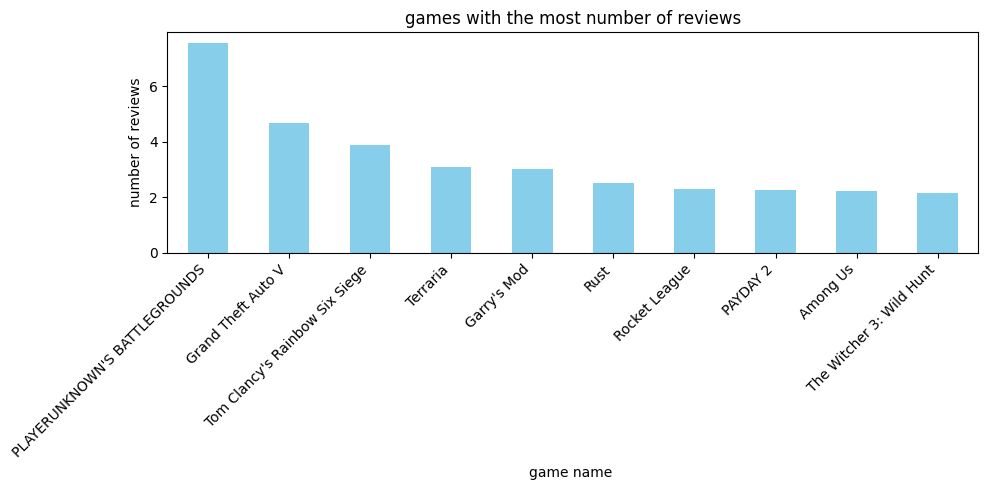

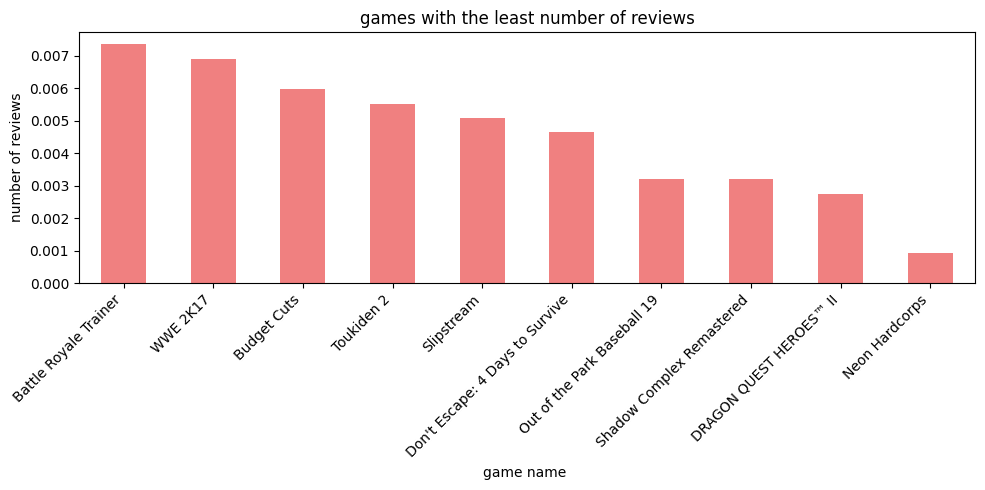

In [14]:
#find the most ancd the least reviewed games in percentage
reviews_per_game_perc=(df['app_name'].value_counts()/df['app_name'].value_counts().sum())*100
top_giochi=reviews_per_game_perc.head(10)
bottom_giochi=reviews_per_game_perc.tail(10)

#plot the barplots
plt.figure(figsize=(10, 5))
top_giochi.plot(kind='bar', color='skyblue')
plt.title('games with the most number of reviews')
plt.xlabel('game name ')
plt.ylabel('number of reviews')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
plt.figure(figsize=(10, 5))
bottom_giochi.plot(kind='bar', color='lightcoral')
plt.title('games with the least number of reviews')
plt.xlabel('game name ')
plt.ylabel('number of reviews')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

We can see that the most reviewed game is "PLAYERUNKNOWN'S BATTLEGROUND" (about 8% of all the reviews in the dataset are on it), the least reviewed is "Neon Hardcorps".
From the graph, the category of games most played are the shooter and action.
The least played graph is more heterogeneous about the categories.

***For the top 5 applications by number of reviews, how many reviews came from users who purchased the application versus those who received it for free? Provide a percentage breakdown and highlight any similarities.***


In [15]:
#frequencies 'steam_purchase'
steam_purchase_counts = df['steam_purchase'].value_counts()
print("frequencies in 'steam_purchase':")
print(steam_purchase_counts)

#frequencies'received_for_free'
received_for_free_counts = df['received_for_free'].value_counts()
print("frequencies in 'received_for_free':")
print(received_for_free_counts)

frequencies in 'steam_purchase':
steam_purchase
True     16842430
False     4904939
Name: count, dtype: int64
frequencies in 'received_for_free':
received_for_free
False    21059308
True       688061
Name: count, dtype: int64


In [16]:
#top 5
top_games=df['app_name'].value_counts().head(5).index

#empty list to store the results
results=[]

#for each top app, calculate the percentage breakdown of reviews by purchase type
for app in top_games:
    app_reviews=df[df['app_name'] == app]
    
    #count purchased vs. received for free
    purchased_reviews=app_reviews[app_reviews['steam_purchase'] == True].shape[0]
    free_reviews=app_reviews[app_reviews['received_for_free'] == True].shape[0]
    total_reviews=app_reviews.shape[0]
    
    #percentages
    purchased_percentage=(purchased_reviews / total_reviews) * 100 
    free_percentage=(free_reviews / total_reviews) * 100 
    
    #reviews with unknown purchase type
    unknown_reviews_percentage=(total_reviews - (purchased_reviews + free_reviews))/total_reviews *100
    
    #append the result as a dictionary
    results.append({
        'app':app,
        'purchased_reviews':purchased_reviews,
        'free_reviews':free_reviews,
        'total_reviews':total_reviews,
        'purchased_percentage':purchased_percentage,
        'free_percentage':free_percentage,
        'unknown_percentage':unknown_reviews_percentage
    })

# print results
results_df=pd.DataFrame(results)
print(results_df)
#calculate and print total percentages 
results_df['total_percentage']=results_df['purchased_percentage'] + results_df['free_percentage']
print("Total percentage check:\n", results_df[['app', 'total_percentage']])

                              app  purchased_reviews  free_reviews  \
0   PLAYERUNKNOWN'S BATTLEGROUNDS            1372721         61443   
1              Grand Theft Auto V             905288         38624   
2  Tom Clancy's Rainbow Six Siege             702505         36300   
3                        Terraria             527762         20154   
4                     Garry's Mod             551250         24765   

   total_reviews  purchased_percentage  free_percentage  unknown_percentage  
0        1644255             83.485895         3.736829           12.777276  
1        1019116             88.830712         3.789951            7.379337  
2         841918             83.441024         4.311584           12.247392  
3         672815             78.440879         2.995474           18.563647  
4         655524             84.093031         3.777894           12.129075  
Total percentage check:
                               app  total_percentage
0   PLAYERUNKNOWN'S BATTLEGROUNDS 

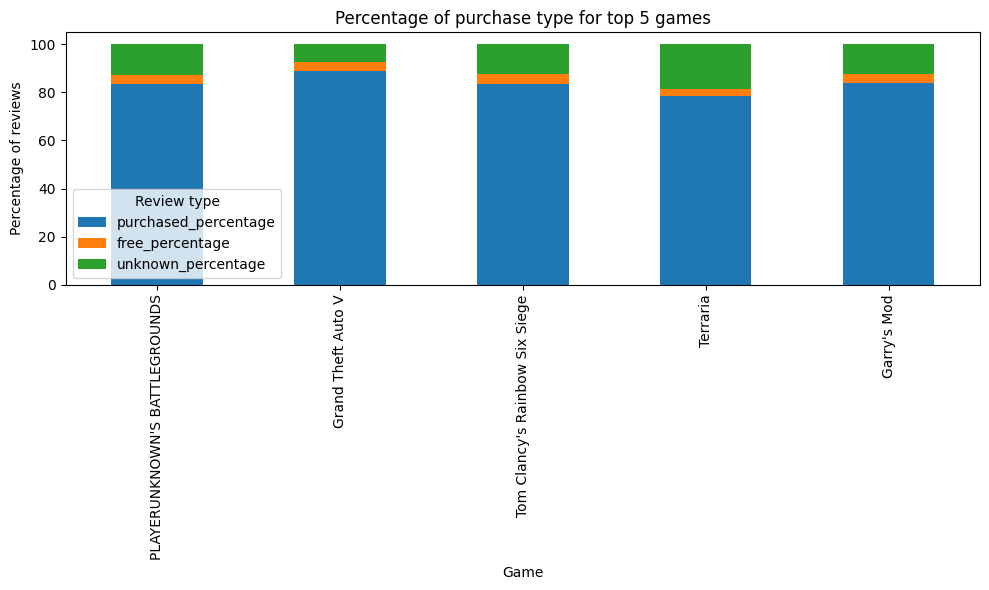

In [17]:
results_df = pd.DataFrame(results)
#barplot 
results_df.set_index('app')[['purchased_percentage', 'free_percentage', 'unknown_percentage']].plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Percentage of purchase type for top 5 games')
plt.xlabel('Game')
plt.ylabel('Percentage of reviews')
plt.legend(title='Review type')
plt.tight_layout()
plt.show()

The data indicates that most games on this list are mainly bought, with "Grand Theft Auto V" leading the pack at an impressive purchase rate of 88.8%. The rates for free reviews are quite low across all titles, suggesting that obtaining these games for free is not common. Additionally, each game has a portion of reviews (from 7% to 18%) marked as "unknown," which means it's uncertain whether users bought or received the game for free. This inconsistency implies that some players might have accessed the game through alternative methods, like promotional codes or different platforms or bundles. So, the total percentages don't sum to 100% due to these unknown instances, but it's evident that purchasing is the primary way players obtain these games.

***Which applications have the most and the least user recommendations? Summarize your findings.***

in absolute terms, we can identify which games have the highest and lowest number of recommendations.

In [60]:
#group by app_id and app_name,then count the recommendations
recommendation_counts=df.groupby(['app_id', 'app_name', 'recommended']).size().unstack(fill_value=0)

recommendation_counts.columns=['Negative', 'Positive']
#identify them
most_recommended=recommendation_counts['Positive'].idxmax() 
least_recommended=recommendation_counts['Positive'].idxmin()
#counts them
most_recommended_counts=recommendation_counts.loc[most_recommended]
least_recommended_counts=recommendation_counts.loc[least_recommended]

print("Most recommended games:")
print(f"App ID: {most_recommended[0]}, game name: {most_recommended[1]}")
print(f"positive reviews: {most_recommended_counts['Positive']}, negative reviews: {most_recommended_counts['Negative']}")

print("\nLeast recommended Games:")
print(f"App ID: {least_recommended[0]}, game name: {least_recommended[1]}")
print(f"positive reviews: {least_recommended_counts['Positive']}, negative reviews: {least_recommended_counts['Negative']}")

Most recommended games:
App ID: 578080, game name: PLAYERUNKNOWN'S BATTLEGROUNDS
positive reviews: 886417, negative reviews: 757838

Least recommended Games:
App ID: 454200, game name: Neon Hardcorps
positive reviews: 89, negative reviews: 111


the result was obvious, because "PLAYERUNKNOWN'S BATTLEGROUNDS" received a much higher number of reviews than the others games.

we can see also what game is the most and least loved by doing an analysis in relative terms, taking the games with the highest and lowest reccomendend ratio.

In [61]:
#calculate the ratio
recommendation_counts['Total_Reviews'] = recommendation_counts['Positive'] + recommendation_counts['Negative']
recommendation_counts['Positive_Ratio'] = recommendation_counts['Positive'] / recommendation_counts['Total_Reviews']

#find the most and least loved games
highest_ratio_game = recommendation_counts['Positive_Ratio'].idxmax()
lowest_ratio_game = recommendation_counts['Positive_Ratio'].idxmin()

#takes the counts
highest_ratio_counts = recommendation_counts.loc[highest_ratio_game]
lowest_ratio_counts = recommendation_counts.loc[lowest_ratio_game]

#display the results
print("Game with the highest positive recommendation ratio:")
print(f"app ID: {highest_ratio_game[0]}, Game Name: {highest_ratio_game[1]}")
print(f"positive ratio: {highest_ratio_counts['Positive_Ratio']:.2f}, Total Reviews: {highest_ratio_counts['Total_Reviews']}")
print(f"positive reviews: {highest_ratio_counts['Positive']}, Negative Reviews: {highest_ratio_counts['Negative']}")

print("\nGame with the lowest positive recommendation ratio:")
print(f"app ID: {lowest_ratio_game[0]}, Game Name: {lowest_ratio_game[1]}")
print(f"positive ratio: {lowest_ratio_counts['Positive_Ratio']:.2f}, Total Reviews: {lowest_ratio_counts['Total_Reviews']}")
print(f"positive reviews: {lowest_ratio_counts['Positive']}, Negative Reviews: {lowest_ratio_counts['Negative']}")

Game with the highest positive recommendation ratio:
app ID: 1229490, Game Name: ULTRAKILL
positive ratio: 1.00, Total Reviews: 5584.0
positive reviews: 5558.0, Negative Reviews: 26.0

Game with the lowest positive recommendation ratio:
app ID: 792990, Game Name: Identity
positive ratio: 0.24, Total Reviews: 1804.0
positive reviews: 439.0, Negative Reviews: 1365.0


this kind of analysis reveals that "ULTRAKILL" is the most loved game, with an extremely high positive rating (around 100%). Nearly everyone who played it has recommended it.
Different stoty for "Identity": only 1 in 4 players have given it a positive review.

**Is there a correlation between the number of recommendations and the applications' review scores? Use a statistical test to confirm the significance of the relationship.**

we define the review score as the ratio between recommended reviews and total reviews for each game.
we are going to use pearson and spearman correlation tests. Addiotionally, in order to reduce the influence of extreme values and obtain a more reliable results, we are to do the statistical test considering only data between the 5th and 95th percentile.

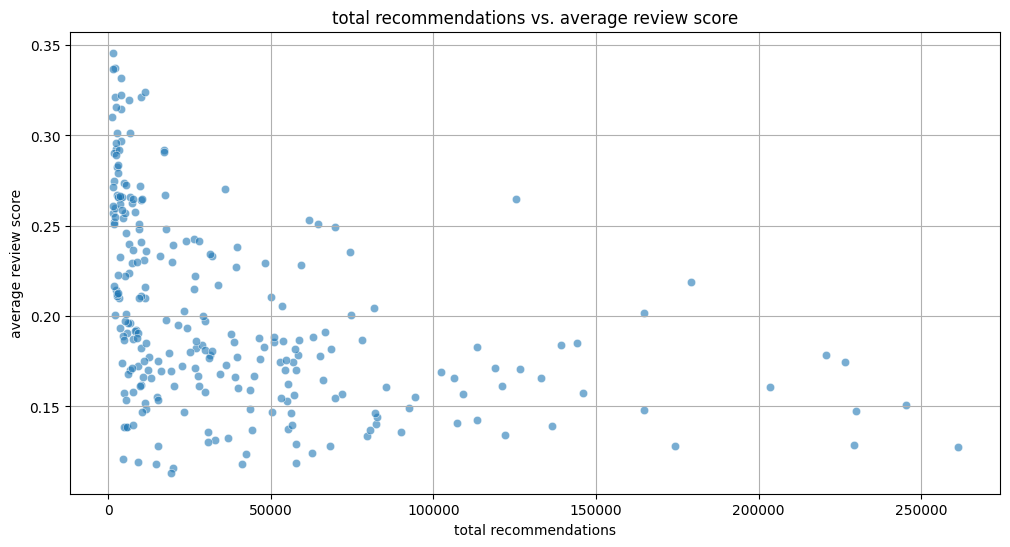

pearson's correlation coefficient: -0.4125
p-value: 4.6048e-12
spearman's correlation coefficient: -0.5698
p-value: 1.0639e-23
intercept: 0.2187
gradient: -0.0000
R^2: 0.1702


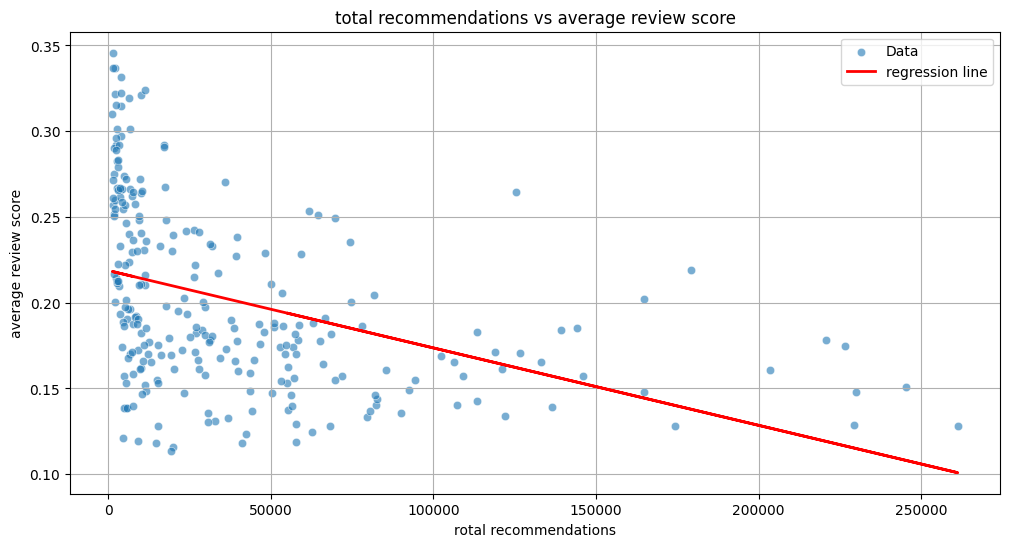

In [20]:
#group by app id and app name 
app_grouped = df.groupby(['app_id', 'app_name']).agg({
    'recommended': 'sum',
    'weighted_vote_score': 'mean',
    'review_id': 'count'
}).rename(columns={
    'recommended': 'total_recommendations',
    'weighted_vote_score': 'average_review_score',
    'review_id': 'total_reviews'
}).reset_index()

#remove the outliers
lower_bound_recc = app_grouped['total_recommendations'].quantile(0.05)
upper_bound_recc = app_grouped['total_recommendations'].quantile(0.95)
lower_bound_score1 = app_grouped['average_review_score'].quantile(0.05)
upper_bound_score1 = app_grouped['average_review_score'].quantile(0.95)

filtered_data = app_grouped[
    (app_grouped['total_recommendations'] >= lower_bound_recc) &
    (app_grouped['total_recommendations'] <= upper_bound_recc) &
    (app_grouped['average_review_score'] >= lower_bound_score1) &
    (app_grouped['average_review_score'] <= upper_bound_score1)
]

#scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(filtered_data['total_recommendations'], filtered_data['average_review_score'], alpha=0.6, edgecolors='w', linewidth=0.5)
plt.title('total recommendations vs. average review score')
plt.xlabel('total recommendations')
plt.ylabel('average review score')
plt.grid(True)
plt.show()

#pearson's correlation
x = filtered_data['total_recommendations']
y = filtered_data['average_review_score']
pearson_corr, pearson_pval = pearsonr(x, y)
print(f"pearson's correlation coefficient: {pearson_corr:.4f}")
print(f"p-value: {pearson_pval:.4e}")

#spearman's correlation
spearman_corr, spearman_pval = spearmanr(x, y)
print(f"spearman's correlation coefficient: {spearman_corr:.4f}")
print(f"p-value: {spearman_pval:.4e}")

# Linear regression
X = x.values.reshape(-1, 1)

regressor = LinearRegression()
regressor.fit(X, y)

# Regressor coefficients
intercept = regressor.intercept_
slope = regressor.coef_[0]
r_squared = regressor.score(X, y)

print(f"intercept: {intercept:.4f}")
print(f"gradient: {slope:.4f}")
print(f"R^2: {r_squared:.4f}")

# scater plot with the regression line
plt.figure(figsize=(12, 6))
plt.scatter(x, y, alpha=0.6, edgecolors='w', linewidth=0.5, label='Data')
plt.plot(x, regressor.predict(X), color='red', linewidth=2, label='regression line')
plt.title('total recommendations vs average review score')
plt.xlabel('rotal recommendations')
plt.ylabel('average review score')
plt.legend()
plt.grid(True)
plt.show()

The Pearson's correlation coefficient is equal to -0.4125 with a very low p-value, indicating a significant negative linear correlation between the number of total recommendations and the average review score.
The Spearman's correlation coefficient is -0.5698 with an extremely low p-value, reinforcing the observation of a negative correlation. Unlike Pearson, Spearman measures rank-based correlation, so it confirms that there is an inverse trend between the two variables even without assuming a linear relationship.
However, the very low r^2 indicates that only 17% of the variability in the mean score can be explained by the total number of recommendations, so the relationship between the variables is not particularly strong.

We can see if applying a logaritmic transformation lead us to the same results.

/var/folders/wn/p0ly0k3d76955wlp0s0hqndw0000gn/T/ipykernel_15385/3565920321.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['log_total_recommendations'] = np.log1p(filtered_data['total_recommendations'])


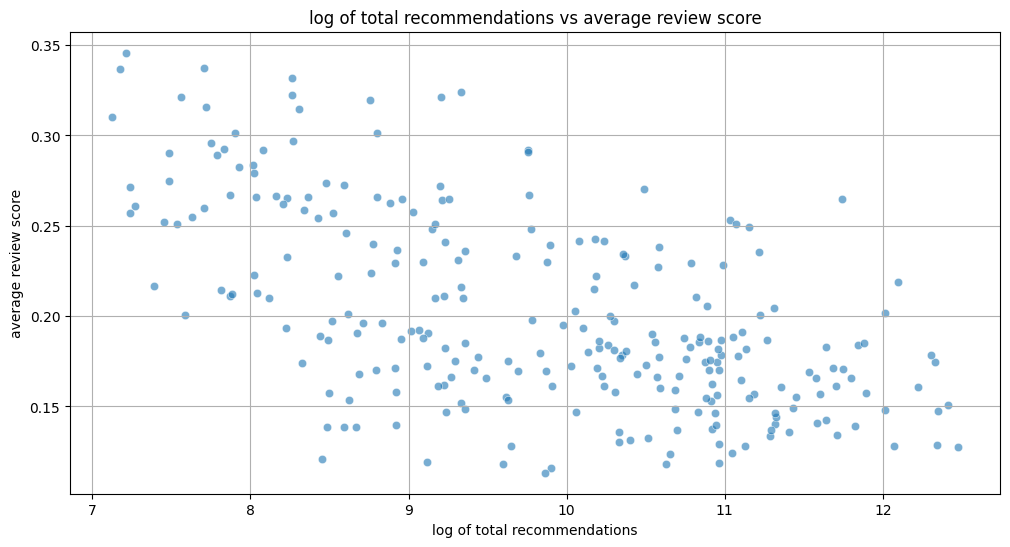

pearson's correlation coefficient: -0.5937
p-value: 4.6609e-26
spearman's correlation coefficient: -0.5698
p-value: 1.0639e-23
intercept: 0.4360
slope: -0.0239
R^2 : 0.3525


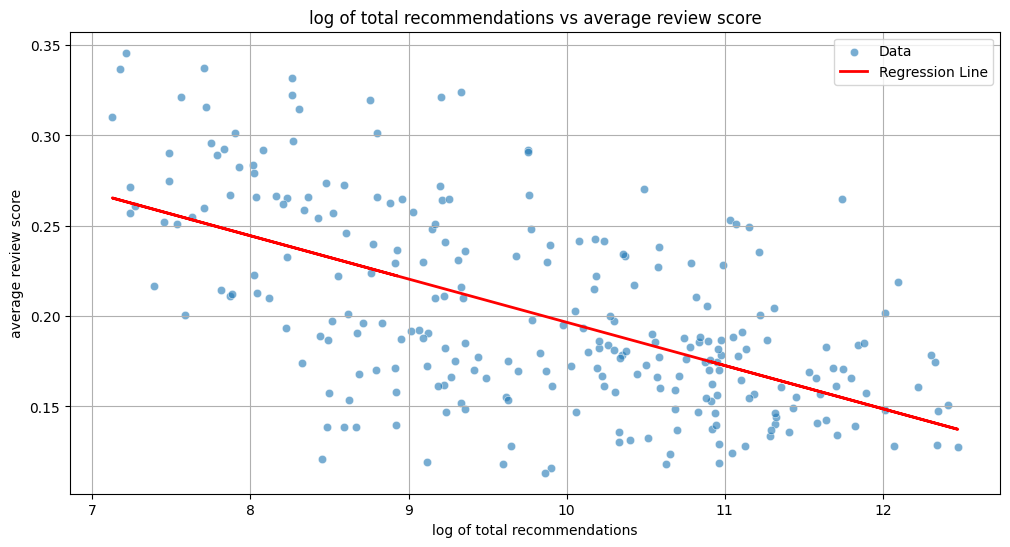

In [21]:
#log transformation of total recommendations
filtered_data['log_total_recommendations'] = np.log1p(filtered_data['total_recommendations'])

#scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(filtered_data['log_total_recommendations'], filtered_data['average_review_score'], alpha=0.6, edgecolors='w', linewidth=0.5)
plt.title('log of total recommendations vs average review score')
plt.xlabel('log of total recommendations')
plt.ylabel('average review score')
plt.grid(True)
plt.show()
#pearson's correlation
x_log = filtered_data['log_total_recommendations']
y_log = filtered_data['average_review_score']
pearson_corr, pearson_pval = pearsonr(x_log, y_log)
print(f"pearson's correlation coefficient: {pearson_corr:.4f}")
print(f"p-value: {pearson_pval:.4e}")

#spearman's correlation
spearman_corr, spearman_pval = spearmanr(x, y)
print(f"spearman's correlation coefficient: {spearman_corr:.4f}")
print(f"p-value: {spearman_pval:.4e}")

#linear regression
log_x = filtered_data['log_total_recommendations'].values.reshape(-1, 1)
regressor_log = LinearRegression()
regressor_log.fit(log_x, y)


#log regressor coefficients
intercept_log = regressor_log.intercept_
slope_log = regressor_log.coef_[0]
r_squared_log = regressor_log.score(log_x, y)

print(f"intercept: {intercept_log:.4f}")
print(f"slope: {slope_log:.4f}")
print(f"R^2 : {r_squared_log:.4f}")

# plot with the regression line 
plt.figure(figsize=(12, 6))
plt.scatter(filtered_data['log_total_recommendations'], y, alpha=0.6, edgecolors='w', linewidth=0.5, label='Data')
plt.plot(filtered_data['log_total_recommendations'], regressor_log.predict(log_x), color='red', linewidth=2, label='Regression Line')
plt.title('log of total recommendations vs average review score')
plt.xlabel('log of total recommendations')
plt.ylabel('average review score')
plt.legend()
plt.grid(True)
plt.show()

We can see that applying a transformation yields better results, as the R^2 value of 0.35 indicates that 35% of the variability is explained by the model. However, the relationship is still not very strong.

These results align with the previous analysis, showing a higher Pearson's correlation coefficient of 0.59 and an equal Spearman's correlation coefficient of 0.56. This confirms the presence of an inverse trend between the two variables, even without assuming a linear relationship.
 

### ***[RQ3] Understanding when users are most active in submitting reviews can help identify peak engagement periods.***

***Plot the number of reviews submitted each month and describe any trends.***

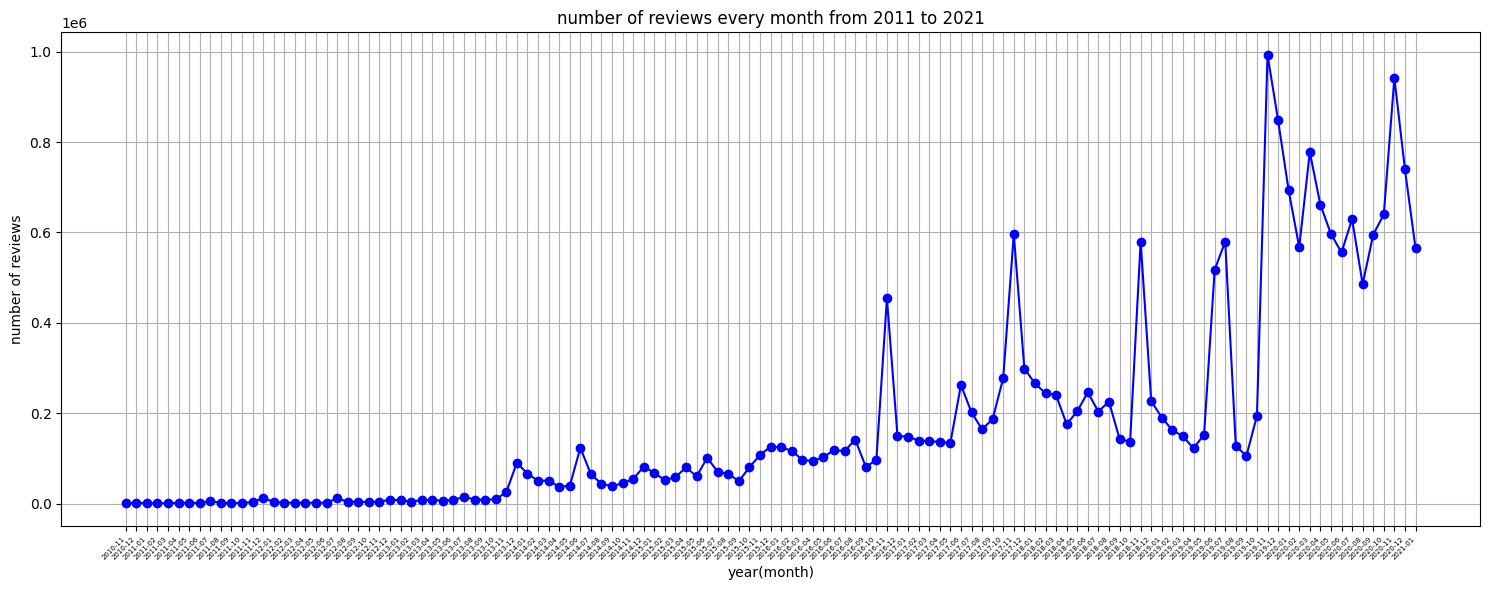

In [22]:
#use the datetime and select the month
df['timestamp_created']=pd.to_datetime(df['timestamp_created'], unit='s')
df['year_month']=df['timestamp_created'].dt.to_period('M')

#grouping by month
monthly_reviews=df.groupby('year_month').size()

#make the graph
plt.figure(figsize=(15, 6))

plt.plot(monthly_reviews.index.astype(str), monthly_reviews, marker='o', color='b')
plt.title('number of reviews every month from 2011 to 2021')
plt.xlabel('year(month)')
plt.ylabel('number of reviews')
plt.grid(True)
plt.xticks(rotation=45, ha='right',fontsize=5)  
plt.tight_layout()
plt.show()



***Identify any seasonal patterns or trends in review activity. Explain any seasonal impact you notice.***



There is an overall growth in the number of reviews over the years. From the early years, with a very low volume of reviews, the number of reviews increases significantly starting from 2013-2014. This trend reflects the growth of the Steam platform and increasing user base.
There are noticeable peaks in specific periods. These peaks could be associated with seasonal events, like christmas (december) and summer holidays(from may to september) where users have much time for play, or Lockdowns (like in 2020 with COVID-19), which have led to an overall increase in online gaming.
Overall, the trend indicates that the number of reviews increased over the years analized (from 2011 to early 2021)

***Determine if certain times of the year have higher engagement rates. Describe noticeable peaks in user activity.***

In [25]:
#take the month and the year of each review
df['month'] = df['timestamp_created'].dt.month
df['year'] = df['timestamp_created'].dt.year


In [26]:
#group by year and take the number of monthly reviews
monthly_groups = df.groupby(['year', 'month']).size().reset_index(name='monthly_groups_reviews')

#group by year an takes the number of annual review
annual_groups = df.groupby('year')['review_id'].count().reset_index(name='annual_groups_reviews')

#merge
monthly_groups_engagement = monthly_groups.merge(annual_groups, on='year')

#caclulates the engagement rate
monthly_groups_engagement['engagement_rate'] = monthly_groups_engagement['monthly_groups_reviews'] / monthly_groups_engagement['annual_groups_reviews']

#display the results
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)  
pd.set_option('display.float_format', '{:.2f}'.format)  
monthly_groups_engagement


,year,month_num,monthly_groups_reviews,annual_groups_reviews,engagement_rate
0,2010,11,555,2373,0.23
1,2010,12,1818,2373,0.77
2,2011,1,824,31018,0.03
3,2011,2,577,31018,0.02
4,2011,3,591,31018,0.02
...,...,...,...,...,...
118,2020,9,595259,7882424,0.08
119,2020,10,639716,7882424,0.08
120,2020,11,941891,7882424,0.12
121,2020,12,739407,7882424,0.09


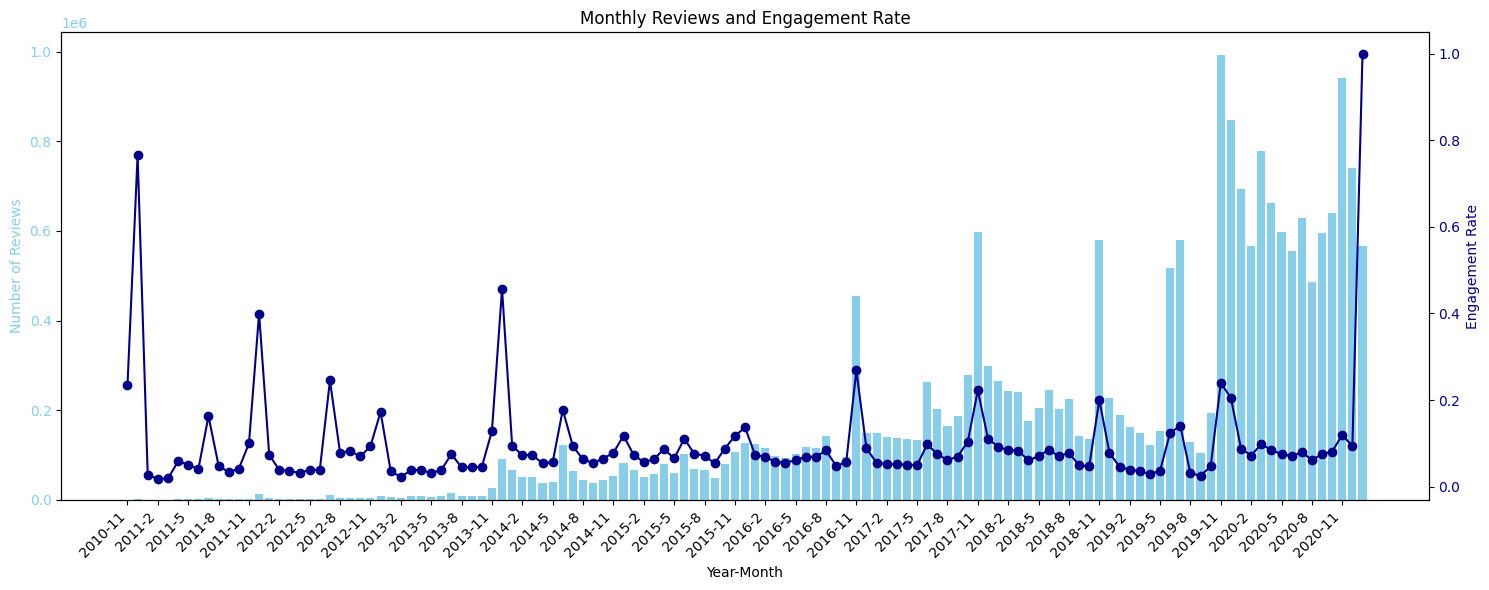

In [27]:
monthly_groups_engagement['year_month'] = monthly_groups_engagement['year'].astype(str) + '-' + monthly_groups_engagement['month'].astype(str)
fig, ax1 = plt.subplots(figsize=(15, 6))

# Grafico a barre per il numero di recensioni mensili
ax1.bar(
    monthly_groups_engagement['year_month'],
    monthly_groups_engagement['monthly_groups_reviews'],
    color='skyblue',
    label='Monthly Reviews'
)
ax1.set_xlabel('Year-Month')
ax1.set_ylabel('Number of Reviews', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_xticks(range(0, len(monthly_groups_engagement), 3))  # Mostra un'etichetta ogni 3 mesi
ax1.set_xticklabels(monthly_groups_engagement['year_month'][::3], rotation=45, ha='right')  # Etichette inclinate

# Linea per il tasso di coinvolgimento
ax2 = ax1.twinx()
ax2.plot(
    monthly_groups_engagement['year_month'],
    monthly_groups_engagement['engagement_rate'],
    color='darkblue',
    marker='o',
    label='Engagement Rate'
)
ax2.set_ylabel('Engagement Rate', color='darkblue')
ax2.tick_params(axis='y', labelcolor='darkblue')

# Titolo e layout
plt.title('Monthly Reviews and Engagement Rate')
fig.tight_layout()
plt.show()

We can see that the values ​​of the years 2010 and 2021 are very high, this is due to the fact that only 2 months of 2010 and only January of 2021 are present, we should not consider them in our analysis.
While the total number of reviews grows over time, the monthly engagement rate shows modest variability, suggesting that not all the months contribute equally to the annual total.
This confirms the seasonal patterns identified before.

***What is the most common time of day users write reviews? For example, users might typically write reviews at 17:44. Explain how this time distribution could influence your analysis.***

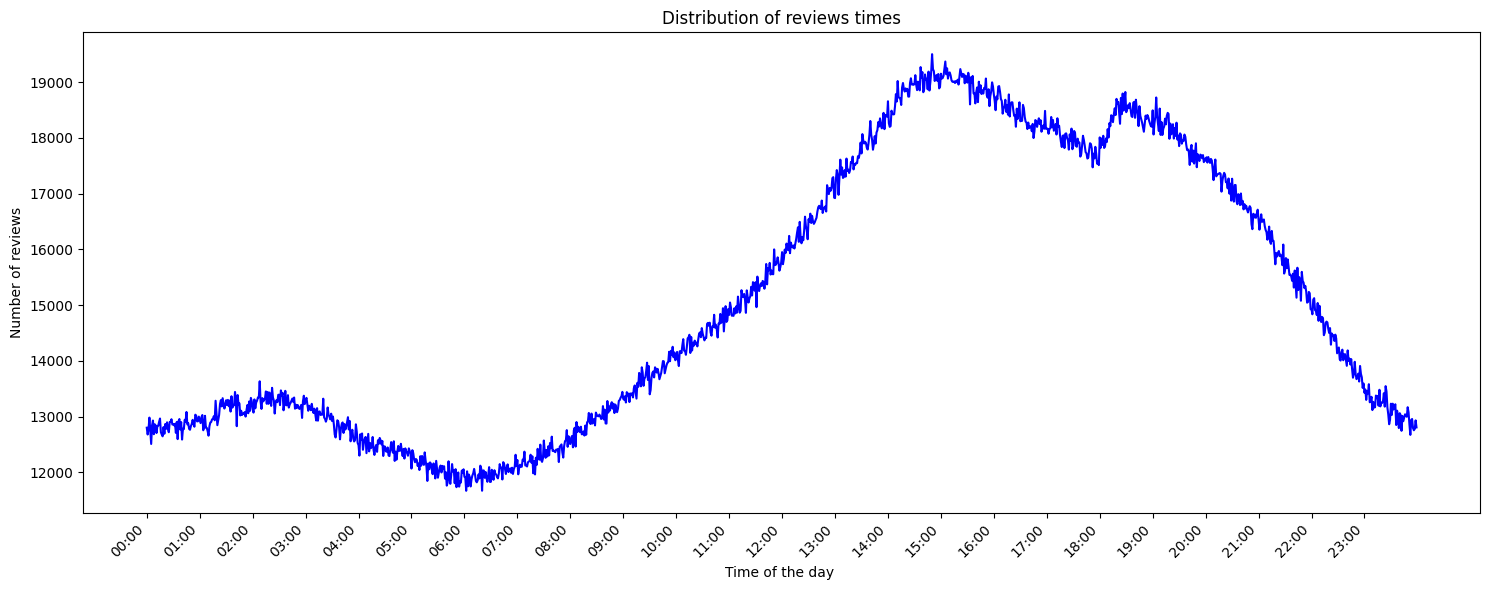

most common time of day for reviews: 14:50


In [40]:
#convert the timestamp in datetime
df['timestamp_created'] = pd.to_datetime(df['timestamp_created'], unit='s')
df['hour_minute'] = df['timestamp_created'].dt.strftime('%H:%M') 
#plot
time_distribution = df['hour_minute'].value_counts().sort_index()
plt.figure(figsize=(15, 6))
plt.plot(time_distribution.index, time_distribution.values, color='blue')
plt.title('Distribution of reviews times')
plt.xlabel('Time of the day ')
plt.ylabel('Number of reviews')
#set x axis 
step_size = 60 
plt.xticks(range(0, len(time_distribution), step_size), 
           time_distribution.index[::step_size], rotation=45, ha='right')  

plt.tight_layout()
plt.show()

#find the most common time 
most_common_time = time_distribution.idxmax()
print(f"most common time of day for reviews: {most_common_time}")



reviews are primarily written at certain times of the day in particuar in the early afternoon, it indicates specific user behavior ,like writing reviews after lunch or after work.

***Create a function that accepts a list of time intervals and plots the number of reviews for each interval.***

In [64]:
def count_time_intervals(df, time_intervals):
    #convert time and select only the hour 
    if df['timestamp_created'].dtype!='datetime64[ns]':
        df['timestamp_created']=pd.to_datetime(df['timestamp_created'], unit='s')
    df['hour']=df['timestamp_created'].dt.hour
    #labels and bins for the time interval
    labels=[f'{start:02d}:00 - {end-1:02d}:59' for start, end in time_intervals]
    bins=[start for start, end in time_intervals] + [time_intervals[-1][1]]
    #create a new column 
    df['time_group']=pd.cut(df['hour'],bins=bins,labels=labels,right=False,include_lowest=True)
    #group by time 
    reviews_per_time_group = df.groupby('time_group').size()
    
    return reviews_per_time_group

/var/folders/wn/p0ly0k3d76955wlp0s0hqndw0000gn/T/ipykernel_15385/2979315818.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  reviews_per_time_group = df.groupby('time_group').size()


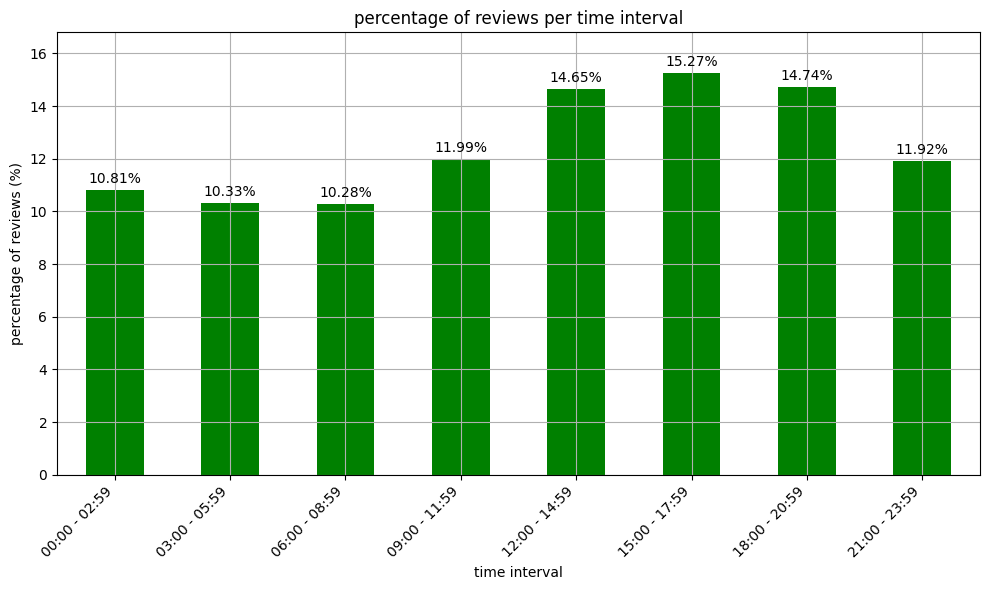

,time interval,reviews,percentage
time_group,,,
00:00 - 02:59,00:00 - 02:59,2351647,10.81%
03:00 - 05:59,03:00 - 05:59,2245879,10.33%
06:00 - 08:59,06:00 - 08:59,2235243,10.28%
09:00 - 11:59,09:00 - 11:59,2608543,11.99%
12:00 - 14:59,12:00 - 14:59,3186546,14.65%
15:00 - 17:59,15:00 - 17:59,3321010,15.27%
18:00 - 20:59,18:00 - 20:59,3205641,14.74%
21:00 - 23:59,21:00 - 23:59,2592860,11.92%


In [65]:
#define the time intervals
time_intervals = [
    (0,3),   #00:00 - 02:59
    (3,6),  #03:00 - 05:59
    (6,9),  #06:00 - 08:59
    (9,12), #09:00 - 11:59
    (12,15), #12:00 - 13:59
    (15,18),#14:00 - 16:59
    (18,21), #17:00 - 19:59
    (21,24)  #20:00 - 23:59
]
time_interval_labels = [
    '00:00 - 02:59',
    '03:00 - 05:59',
    '06:00 - 08:59',
    '09:00 - 11:59',
    '12:00 - 14:59',
    '15:00 - 17:59',
    '18:00 - 20:59',
    '21:00 - 23:59'
]
#count the reviews for interval
reviews_per_interval=count_time_intervals(df, time_intervals)
reviews_per_interval_percentage=[i/sum(reviews_per_interval)*100 for i in reviews_per_interval]
data_time = {
    'time interval': time_interval_labels,
    'reviews': reviews_per_interval,
    'percentage': reviews_per_interval_percentage
}
#dataset
df_table = pd.DataFrame(data_time)

#graph
plt.figure(figsize=(10, 6))
ax = df_table['percentage'].plot(kind='bar', color='g')
ax.set_title('percentage of reviews per time interval')
ax.set_xlabel('time interval')
ax.set_ylabel('percentage of reviews (%)')
ax.set_xticks(range(len(time_interval_labels)))
ax.set_xticklabels(time_interval_labels, rotation=45, ha='right')
ax.set_ylim(0, df_table['percentage'].max() * 1.1)  # Add some space above the highest bar

#add percentage labels on top of each bar
for i, pct in enumerate(df_table['percentage']):
    ax.text(i, pct + df_table['percentage'].max() * 0.01, f'{pct:.2f}%', ha='center', va='bottom')

plt.grid(True)
plt.tight_layout()
plt.show()
#display the dataset
df_table['percentage'] = df_table['percentage'].map('{:.2f}%'.format)
display(df_table)

The intervals 3pm-6pm and  6pm-9pm present the highest percentages of reviews, with 15.27% and 14.74% respectively. This indicates that afternoon and evening are when users are most active in leaving reviews.
The intervals 3am-6am and 6am-9am are the ones withe lowest percentages, due to the fact the the most of the people sleep on the time of the day.

***Use the function to plot the number of reviews for the following time intervals:***
Initial Time	Final Time

00:00:00	02:59:59

03:00:00	05:59:59

06:00:00	10:59:59

11:00:00	13:59:59

14:00:00	16:59:59

17:00:00	19:59:59

20:00:00	23:59:59

/var/folders/wn/p0ly0k3d76955wlp0s0hqndw0000gn/T/ipykernel_9694/306284853.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  reviews_per_time_group = df.groupby('time_group').size()


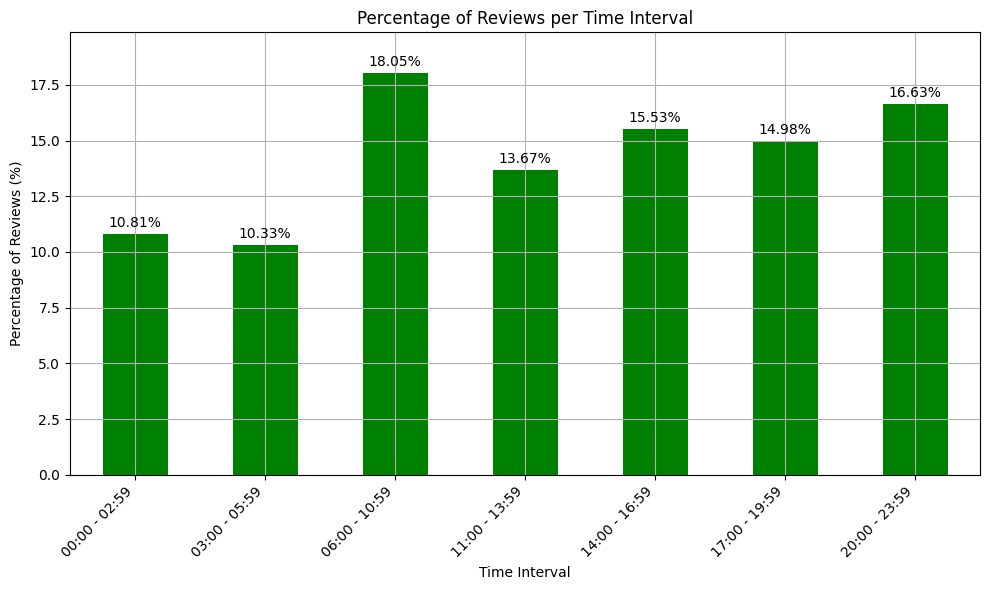

,time interval,reviews,percentage
time_group,,,
00:00 - 02:59,00:00 - 02:59,2351647,10.81%
03:00 - 05:59,03:00 - 05:59,2245879,10.33%
06:00 - 10:59,06:00 - 10:59,3925458,18.05%
11:00 - 13:59,11:00 - 13:59,2971997,13.67%
14:00 - 16:59,14:00 - 16:59,3377468,15.53%
17:00 - 19:59,17:00 - 19:59,3257494,14.98%
20:00 - 23:59,20:00 - 23:59,3617426,16.63%


In [47]:

time_intervals = [
    (0, 3),    # 00:00 - 02:59
    (3, 6),    # 03:00 - 05:59
    (6, 11),   # 06:00 - 10:59
    (11, 14),  # 11:00 - 13:59
    (14, 17),  # 14:00 - 16:59
    (17, 20),  # 17:00 - 19:59
    (20, 24)   # 20:00 - 23:59
]
 
time_interval_labels = [
    '00:00 - 02:59',
    '03:00 - 05:59',
    '06:00 - 10:59',
    '11:00 - 13:59',
    '14:00 - 16:59',
    '17:00 - 19:59',
    '20:00 - 23:59'
]
 
#count the reviews for each bin
reviews_per_interval = count_time_intervals(df, time_intervals)
reviews_per_interval_percentage = [i / sum(reviews_per_interval) * 100 for i in reviews_per_interval]
 
data_time = {
    'time interval': time_interval_labels,
    'reviews': reviews_per_interval,
    'percentage': reviews_per_interval_percentage
}
 

df_table = pd.DataFrame(data_time)
 
#barplot
plt.figure(figsize=(10, 6))
ax = df_table['percentage'].plot(kind='bar', color='g')
ax.set_title('Percentage of Reviews per Time Interval')
ax.set_xlabel('Time Interval')
ax.set_ylabel('Percentage of Reviews (%)')
ax.set_xticks(range(len(time_interval_labels)))
ax.set_xticklabels(time_interval_labels, rotation=45, ha='right')
ax.set_ylim(0, df_table['percentage'].max() * 1.1)  # Aggiungi spazio sopra la barra più alta
 
for i, pct in enumerate(df_table['percentage']):
    ax.text(i, pct + df_table['percentage'].max() * 0.01, f'{pct:.2f}%', ha='center', va='bottom')
 
plt.grid(True)
plt.tight_layout()
plt.show()
 
#display the dataset
df_table['percentage'] = df_table['percentage'].map('{:.2f}%'.format)
display(df_table)

These results are inconclusive and do not clearly indicate the most common time interval for writing a review, as the intervals are not all the same in length. The highest percentage is found in the largest interval, even though previous graphs show that  (after the night time) are typically when users are least active.

### ***[RQ4] Investigating whether users who spend more time using an application give higher or lower ratings.***

***Analyze the relationship between the amount of time a user has spent on an application and their review score.***

/Users/riccardo.soleo/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


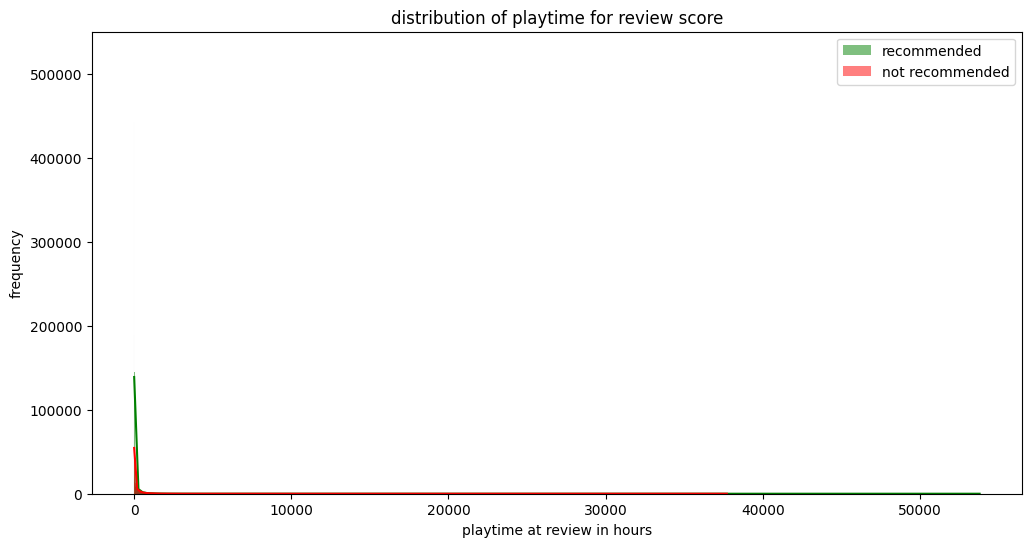

count   21747369.00
mean         146.62
std          397.89
min            0.00
25%            9.27
50%           31.27
75%          113.50
max        53801.72
Name: playtime_at_review_hours, dtype: float64


In [66]:
#convert the playtime in hour 
df['playtime_at_review_hours'] = df['author.playtime_at_review'] / 60  
#plot the histogram
plt.figure(figsize=(12,6))
sns.histplot(df[df['recommended'] == True]['playtime_at_review_hours'], color='green', label='recommended', kde=True)
sns.histplot(df[df['recommended'] == False]['playtime_at_review_hours'], color='red', label='not recommended', kde=True)
plt.xlabel('playtime at review in hours')
plt.ylabel('frequency')
plt.title('distribution of playtime for review score')
plt.legend()
plt.show()

#print the statistics
print(df['playtime_at_review_hours'].describe())

As we can see there are some outliers (the max, 50000 hours of playtime are 5 years of uninterrupted play!), it's a good idea to remove them before continuing with the analysis.

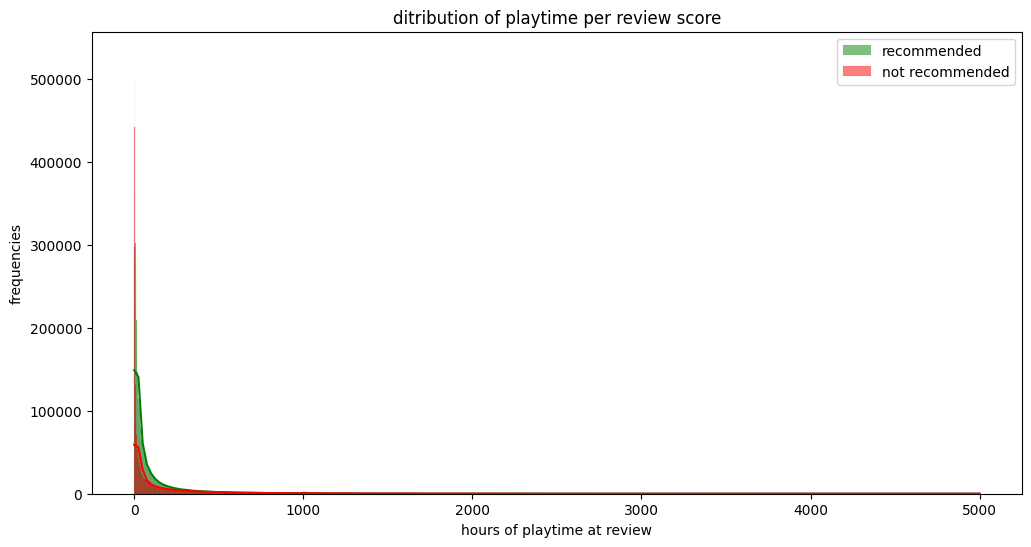

In [67]:
#set max playtime in order to remove outliers
max_playtime = 5000

#filter the dataset 
df_filtered_by_playtime = df[df['playtime_at_review_hours'] <= max_playtime].copy()

#plot the histogram with the filter dataset
plt.figure(figsize=(12,6))

sns.histplot(
    df_filtered_by_playtime[df_filtered_by_playtime['recommended'] == True]['playtime_at_review_hours'],
    color='green',
    label='recommended',
    kde=True
)

sns.histplot(
    df_filtered_by_playtime[df_filtered_by_playtime['recommended'] == False]['playtime_at_review_hours'],
    color='red',
    label='not recommended',
    kde=True
)

plt.xlabel('hours of playtime at review')
plt.ylabel('frequencies')
plt.title('ditribution of playtime per review score')
plt.legend()
plt.show()

given that the distribution is asymetric and decays exponentially, we can consider to apply a logaritmic transformation

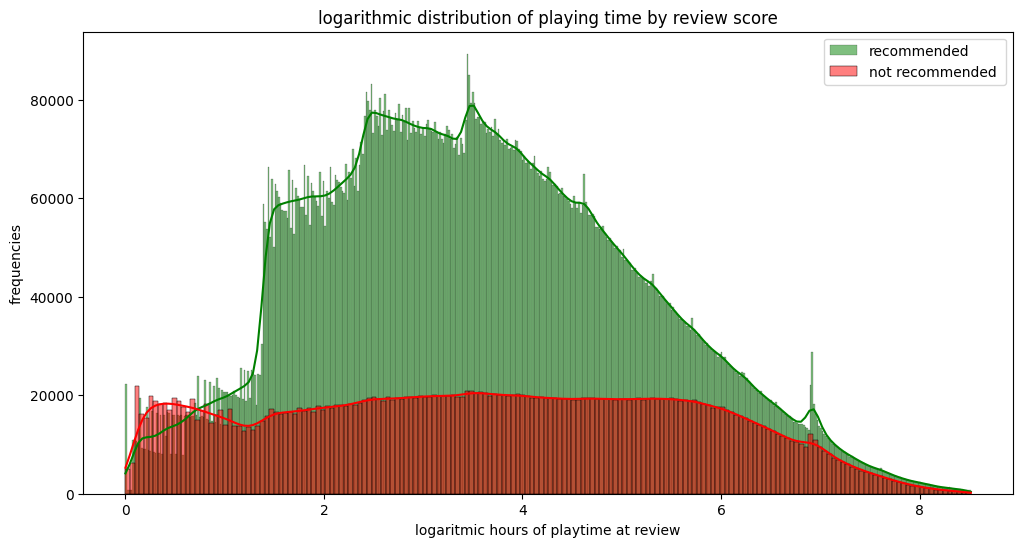

In [68]:
# aplly logaritmic transformation
df_filtered_by_playtime['log_playtime'] = np.log1p(df_filtered_by_playtime['playtime_at_review_hours'])

#plot the istogram 
plt.figure(figsize=(12,6))
sns.histplot(
    df_filtered_by_playtime[df_filtered_by_playtime['recommended'] == True]['log_playtime'],
    color='green',
    label='recommended',
    kde=True
)
sns.histplot(
    df_filtered_by_playtime[df_filtered_by_playtime['recommended'] == False]['log_playtime'],
    color='red',
    label='not recommended ',
    kde=True
)
plt.xlabel('logaritmic hours of playtime at review')
plt.ylabel('frequencies')
plt.title('logarithmic distribution of playing time by review score')
plt.legend()
plt.show()

***Do more experienced users (who have used the application longer) tend to give higher or lower ratings? Comment on any trends you observe.***

Looking at the graph, we see the logarithmic distribution of play time (in hours) at the time of the review, split between "recommended" reviews in green and "not recommended" in red. 
"recommended" reviews are much more frequent than "not recommended", especially for longer periods of play. This could indicate a positive correlation between playing time and the likelihood of recommending the game. Most "recommended" reviews tend to cluster between about 2 and 6, corresponding to about 7.4 hours to 403 hours. 
“Not recommended” reviews are more consistent, but with decreasing frequency as play time increases. For both groups, there is a spike in reviews for very short play times, with a slight decline in "not recommended" reviews compared to "recommended" reviews. This may indicate that some players leave negative reviews without being deep involvement in the game. 

So overall, players who spend more time on a game seem more likely to recommend it, which is consistent with the idea that greater engagement and satisfaction tend to go hand in hand; on the other hand, dissatisfied players might abandon the game quickly and write a negative review, while those who continue playing for a long time often end up recommending it.

We can also calculate the correlation coefficient to validate this statement.

In [69]:
df_filtered_by_playtime['recommended_numeric'] = df_filtered_by_playtime['recommended'].astype(int)
correlation = df_filtered_by_playtime['log_playtime'].corr(df_filtered_by_playtime['recommended_numeric'])
print(f'correlation coefficient: {round(correlation,4)}')

correlation coefficient: -0.0133


the result indicate a null correlation, this may be becouse the relation between time played and review score is not linear. we can use a non linear regression to explore it.

In [70]:
#add a quadratic component 
df_filtered_by_playtime['log_playtime_squared'] = df_filtered_by_playtime['log_playtime'] ** 2
X = df_filtered_by_playtime[['log_playtime', 'log_playtime_squared']]
y = df_filtered_by_playtime['recommended_numeric']

#add intercept
X = sm.add_constant(X)

#logistic regression model
model = sm.Logit(y, X).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.368591
         Iterations 6
                            Logit Regression Results                           
Dep. Variable:     recommended_numeric   No. Observations:             21731352
Model:                           Logit   Df Residuals:                 21731349
Method:                            MLE   Df Model:                            2
Date:                 Sat, 02 Nov 2024   Pseudo R-squ.:                 0.02315
Time:                         17:51:00   Log-Likelihood:            -8.0100e+06
converged:                        True   LL-Null:                   -8.1998e+06
Covariance Type:             nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.8524      0.002    378.393      0.000       0.848    

log_playtime= 0.7820: this coefficient is positive and significant (p-value=0), suggesting that as the logarithm of playing time increases, the probability of recommending the game increases. Then, the more a player plays, the more they tend to recommend the game, at least initially.

const= 0.8360: The intercept represents the odds of recommending the game when both log_playtime and log_playtime_squared are zero (when the playtime is 1 minute, since log⁡(1)=0).

log_playtime_squared= -0.1053: this coefficient is negative and significant (p < 0.001), suggesting that the effect of log_playtime is nonlinear.
this implies that, beyond a certain point, increasing playing time reduces the likelihood of recommending the game.
Pseudo R-squared= 0.02328: this value is quite low, indicating that the model explains only about 2.33% of the variation in the dependent variable (the game recommendation).

We should then analize the relationship with others non linear models, but the trend is clearly that both new and veterans gamers give similar opinions.

***Plot the distribution of review scores based on different user experience levels (e.g., new users vs. veteran users). Is there a statistical difference in the score distributions? Use an appropriate statistical test to validate your hypothesis.***

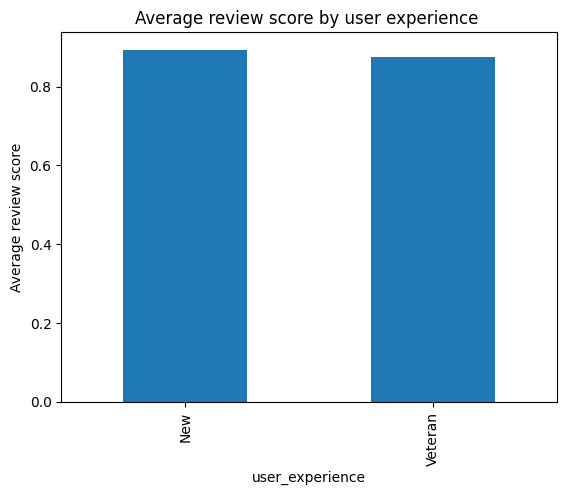

Chi^2: 3606.808543398444
p-value: 0.0


In [72]:
#create a copy of the dataset 
df_copy1 = df.copy()

#define thresholds for experience 
playtime_threshold = 50  
games_owned_threshold = 10

#add the new column 
df_copy1['user_experience'] = df_copy1.apply(
    lambda row: 'Veteran' if (row['author.playtime_forever'] >= playtime_threshold * 60) or 
                               (row['author.num_games_owned'] >= games_owned_threshold)
                 else 'New', axis=1)

# extract review scores 
df_copy1['review_score'] = df_copy1['recommended'].map({True: 1, False: 0})

#group data by experience 
grouped_data = df_copy1.groupby('user_experience')['review_score']

#plot the distribution
fig, ax = plt.subplots()
grouped_data.mean().plot(kind='bar', ax=ax)
ax.set_title('Average review score by user experience ')
ax.set_ylabel('Average review score')
plt.show()

#perform Chi-squared test 
contingency_table = pd.crosstab(df_copy1['user_experience'], df_copy1['recommended'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi^2: {chi2}")
print(f"p-value: {p}")

we can see that the chi2 is really high, but only becouse the chi2 increases as the sample size increases. we can't see substantial differences in the graph and in the average review score. what about we suddivide the dataset in more subset?

/var/folders/wn/p0ly0k3d76955wlp0s0hqndw0000gn/T/ipykernel_9694/99532189.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df_copy2.groupby('user_experience')['review_score']


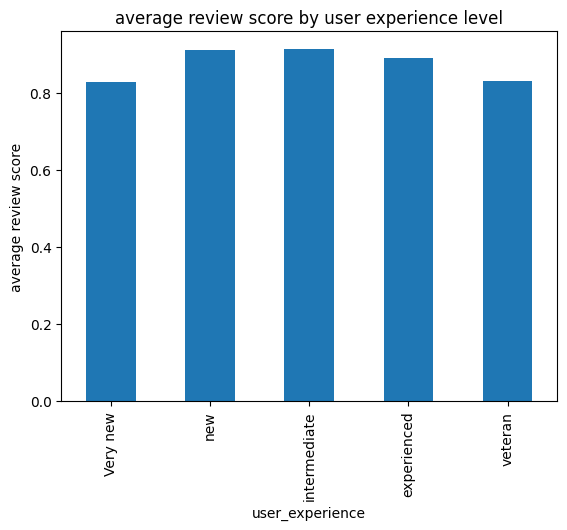

chi^2: 287852.40314044704
p-value: 0.0


In [73]:

df_copy2 = df.copy()

# divide the dataset in 5 percentiles
playtime_quintiles = df_copy2['author.playtime_forever'].quantile([0.2, 0.4, 0.6, 0.8]).values

#add new column
def user_experience_level(playtime):
    if playtime < playtime_quintiles[0]:
        return 'Very new'
    elif playtime < playtime_quintiles[1]:
        return 'new'
    elif playtime < playtime_quintiles[2]:
        return 'intermediate'
    elif playtime < playtime_quintiles[3]:
        return 'experienced'
    else:
        return 'veteran'

df_copy2['user_experience'] = df_copy2['author.playtime_forever'].apply(user_experience_level)

# set the order 
experience_order = ['Very new', 'new', 'intermediate', 'experienced', 'veteran']
df_copy2['user_experience'] = pd.Categorical(df_copy2['user_experience'], categories=experience_order, ordered=True)

#takes the review score
df_copy2['review_score'] = df_copy2['recommended'].map({True: 1, False: 0})

#group by experince level
grouped_data = df_copy2.groupby('user_experience')['review_score']

#plot 
fig, ax = plt.subplots()
grouped_data.mean().plot(kind='bar', ax=ax)
ax.set_title('average review score by user experience level')
ax.set_ylabel('average review score')
plt.show()
#perform the chi^2 test
contingency_table = pd.crosstab(df_copy2['user_experience'], df_copy2['recommended'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"chi^2: {chi2}")
print(f"p-value: {p}")


despite small variations, the mean scores are very close between the various groups, which suggests that there is no marked difference in rating score between the groups in practical terms.
A p-value of 0.0 indicates that we should reject the null hypothesis that there is no difference in the distribution of ratings between the experience groups, on the other hand these results suggest that the impact may be useless. Even if the test is significant, the actual difference is very small.

***Ask an LLM tool (ChatGPT, Claude AI, etc.) to interpret the statistical results of the analysis and provide potential explanations for the trends.***

The statistical analysis of Steam review data reveals interesting and statistically significant patterns in the relationship between user experience and their review scores. Examining the results in detail, two complementary perspectives emerge based on different categorizations of user experience.
In the first analysis, which simply divides users into “New” and “Veteran,” we observe a statistically significant difference supported by a chi-square test with a value of 3606.80 and a p-value of 0.0. This strong statistical significance confirms that the observed differences between the two groups are not random but reflect a real behavioral pattern.
The second, more granular analysis, which subdivides users into five experience categories (Very New, New, Intermediate, Experienced, and Veteran), reveals a more complex and nuanced pattern. The chi-square test in this case produces a value of 287852.19 with a p-value of 0.0, again confirming the statistical significance of the observed differences.
Looking at specific patterns, we notice that users classified as “Very New” tend to give slightly lower ratings, with an average around 0.82. Interestingly, there is a peak in positive ratings observed in the “New” and “Intermediate” categories, where averages approach 0.90. Subsequently, a gradual decline in average ratings is noted for the “Experienced” and “Veteran” categories, which hover around 0.85.
These patterns can be explained through several hypotheses:
For very new users, lower ratings might be attributed to the initial learning curve. Less familiarity with game mechanics and the platform could lead to some frustration, reflected in more critical ratings.
The peak of positive ratings among users with intermediate experience might represent a “sweet spot” where users have overcome initial difficulties but still maintain a high level of enthusiasm. At this stage, they have developed enough competence to fully enjoy the games but have not yet developed overly high or critical expectations.
The gradual decline in ratings among more experienced users could be attributed to several factors. As experience increases, users develop higher standards and more sophisticated evaluation criteria. Additionally, having played many titles, they might be more inclined to make critical comparisons and notice similarities or lack of innovation.
It is important to note that these differences, while statistically significant, are relatively subtle in terms of magnitude. This suggests that while user experience certainly influences ratings, it is not the only determining factor in shaping user opinions about games.
The statistical robustness of these results, highlighted by the extremely low p-values in both analyses, suggests that these patterns are not random but reflect real trends in the behavior of Steam platform users. However, as with any statistical analysis, it is important to consider these results as part of a broader picture that includes numerous other factors influencing user ratings.

***Does the LLM suggest additional factors that could explain why users who spend more time on the app give higher or lower ratings?***

-Analyzing the behavior of users who spend more time on the Steam platform, several additional factors emerge that could explain variations in their ratings. These factors go beyond the simple measure of time spent on the application and provide a more comprehensive perspective on the phenomenon.

-One significant factor is the evolution of users’ critical experience. Over time, users develop a deeper understanding of game mechanics and industry standards. This increased awareness may lead to more critical and thoughtful ratings based not only on immediate entertainment but also on technical, narrative, and design aspects of the game. Experienced users might pay more attention to details such as code optimization, user interface fluidity, or the depth of gameplay systems.

-The economic aspect also plays a crucial role. Users who spend a lot of time on the platform tend to accumulate a larger library of games, developing a greater sensitivity to the value-for-money ratio. This can influence their ratings based on how they perceive the value of the game relative to its cost and the hours of entertainment it offers. Moreover, they might be more aware of monetization practices and more critical of aggressive or opaque business models.

-Another relevant factor is the effect of saturation or “burnout.” Users who have accumulated many hours on the platform may develop a certain fatigue or disillusionment with repetitive game mechanics or well-trodden formulas. This can lead to harsher ratings for games that do not offer significant innovations or that rehash elements already widely explored in other titles.

-The influence of the community and social environment cannot be underestimated. Long-time users tend to be more integrated into gaming communities, participating in discussions, following professional reviewers, and engaging with other experienced players. This exposure can influence their evaluation criteria and expectations, leading them to align with community standards or, conversely, to develop more critical and independent viewpoints.

-Technical expectations represent another crucial factor. Experienced users have witnessed the technological evolution of video games over time and may have higher expectations in terms of technical performance, graphics quality, and innovation. This can lead to harsher ratings for games that do not meet these high standards or that present technical issues.

-Emotional investment in the gaming medium can also influence ratings. Long-time users may have a particular attachment to certain genres or series, leading them to be more critical of changes or innovations that deviate from their expectations. At the same time, they may be more lenient toward games that reflect their established tastes.

-Finally, the maturation of personal taste plays an important role. With experience, users refine their preferences and develop a clearer understanding of what they appreciate in video games. This can lead to more polarized ratings, where games that meet their criteria receive very positive ratings, while those that do not meet their criteria receive more negative ratings.

-These additional factors suggest that the relationship between time spent on the platform and ratings is complex and multifaceted, influenced by a combination of psychological, social, economic, and technical elements that evolve with user experience.

***How can you validate the interpretations provided by the LLM?***

To validate the interpretations provided by the LLM, we can explore several methodological approaches. First, we might conduct a sentiment analysis on the textual reviews, comparing the language used by users with varying levels of experience. This would help us verify whether the factors suggested by the LLM, such as increased technical criticality or a focus on value for money, are actually reflected in the reviews content. A second method for validation could involve a temporal analysis, observing how the reviews from the same users evolve over time as they gain more experience on the platform. This could either confirm or challenge the idea that preferences and criticality change over time.   Lastly, we could carry out a comparative analysis with similar datasets from other platforms to see if the patterns identified by the LLM hold true across different gaming platforms or if they are unique to Steam.   These validation methods would provide solid evidence to either support or challenge the interpretations suggested by the LLM, thereby enhancing the reliability of the analysis conclusions.

### ***[RQ5] It is interesting to explore the top reviewers to gain insight into their demographic location, the quality of their reviews, and the applications they tend to review most frequently.***

***Determine the ten reviewers with the highest number of reviews in the dataset.***

In [74]:
top_10_reviewers=df.groupby('author.steamid').size().sort_values(ascending=False).head(10)
print(top_10_reviewers)


author.steamid
76561198062813911    149
76561198315585536    132
76561198192166873    107
76561198239163744    106
76561198045381877    103
76561198064946151    100
76561198013146396     99
76561198027973295     96
76561197969749884     88
76561197989746995     86
dtype: int64


***What is the percentage of each language used by these top 10 reviewers when submitting a review?***

In [75]:
top_10_reviewer_ids = top_10_reviewers.index
filtered_reviews1 = df[df['author.steamid'].isin(top_10_reviewer_ids)]
#count the occurrences of each language in the filtered dataset
language_counts = filtered_reviews1['language'].value_counts()
language_percentage = round((language_counts / language_counts.sum()) * 100,2)
#display the result
print(language_percentage)

language
english    53.94
russian    28.14
schinese   17.92
Name: count, dtype: float64


The output highlights that the top 10 reviewers write reviews primarily in english (the majority of reviews are in english, about 54% of total reviews), with good representation for russian and chinese as well.

***Let's examine whether other users found the reviews from these top 10 reviewers helpful or if they were simply spamming. Calculate the average number of valuable votes these reviewers received for their submitted reviews. Elaborate on the results you see.***

In [76]:
average_helpful_votes = filtered_reviews1.groupby('author.steamid')['votes_helpful'].mean()
average_helpful_votes = average_helpful_votes.reindex(top_10_reviewers.index)
print(round(average_helpful_votes,2))

author.steamid
76561198062813911    0.89
76561198315585536   49.71
76561198192166873   38.90
76561198239163744    7.64
76561198045381877    2.25
76561198064946151    3.99
76561198013146396    0.97
76561198027973295   11.80
76561197969749884   26.24
76561197989746995   21.06
Name: votes_helpful, dtype: float64


The average helpful votes of the top-ten reviewers are between a minimum of 0.89 to a maximum of 49.71. That would suggest that whereas some reviewers (like the second one with the most reviews in the dataset, ID:76561198315585536)tend to produce content of high value to the community, others may be seen as less relevant and receive few helpful votes( like the first one with an average of 0.89 helpful votes for each reviews, ID:76561198062813911), this might indicate a spam by them.
This gap suggests that more reviews do not imply a better or more helpful quality.

***Create a plot showing the distribution of the number of reviews each application received from the top 10 reviewers, arranged in descending order.***

/var/folders/wn/p0ly0k3d76955wlp0s0hqndw0000gn/T/ipykernel_9694/1851788959.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


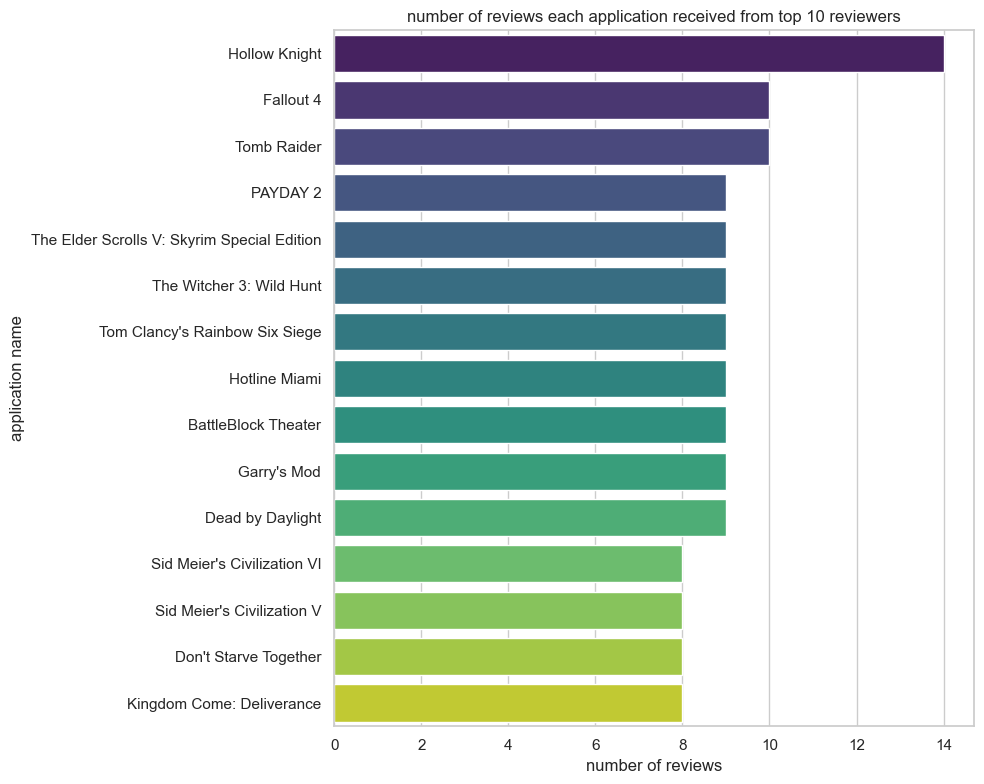

application: Hollow Knight
number of reviews: 14
percentage of total reviews: 1.31%

application: Fallout 4
number of reviews: 10
percentage of total reviews: 0.94%

application: Tomb Raider
number of reviews: 10
percentage of total reviews: 0.94%

application: PAYDAY 2
number of reviews: 9
percentage of total reviews: 0.84%

application: The Elder Scrolls V: Skyrim Special Edition
number of reviews: 9
percentage of total reviews: 0.84%

application: The Witcher 3: Wild Hunt
number of reviews: 9
percentage of total reviews: 0.84%

application: Tom Clancy's Rainbow Six Siege
number of reviews: 9
percentage of total reviews: 0.84%

application: Hotline Miami
number of reviews: 9
percentage of total reviews: 0.84%

application: BattleBlock Theater
number of reviews: 9
percentage of total reviews: 0.84%

application: Garry's Mod
number of reviews: 9
percentage of total reviews: 0.84%

application: Dead by Daylight
number of reviews: 9
percentage of total reviews: 0.84%

application: Sid Me

In [77]:
app_review_counts = filtered_reviews1.groupby('app_name').size().sort_values(ascending=False)
#for readability we will take only the fisrt 15 games
top_10_app_review_counts = app_review_counts.head(15)

#create the graph
sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))
sns.barplot(
    y=top_10_app_review_counts.index, 
    x=top_10_app_review_counts.values, 
    palette="viridis"
)
plt.title('number of reviews each application received from top 10 reviewers')
plt.xlabel('number of reviews')
plt.ylabel('application name')

plt.tight_layout()
plt.show()

#display the result in a table
for app_name, count in top_10_app_review_counts.items():
    percentage = (count / app_review_counts.sum()) * 100
    print(f"application: {app_name}\nnumber of reviews: {count}\npercentage of total reviews: {percentage:.2f}%\n")

### ***[RQ6] Let's investigate the behavior of specific groups, specifically focusing on English and Spanish reviewers***

***Which group is more likely to edit or update their review after submitting it? “English or Spanish!”?.***

In [49]:
#find english and spanish reviews
eng_reviews = df[df['language'] == 'english'].copy()
spn_reviews = df[df['language'] == 'spanish'].copy()

#convert the timestamp to datetime
eng_reviews['timestamp_created'] = pd.to_datetime(eng_reviews['timestamp_created'],unit='s')
eng_reviews['timestamp_updated'] = pd.to_datetime(eng_reviews['timestamp_updated'],unit='s')
spn_reviews['timestamp_created'] = pd.to_datetime(spn_reviews['timestamp_created'],unit='s')
spn_reviews['timestamp_updated'] = pd.to_datetime(spn_reviews['timestamp_updated'],unit='s')

#find the updates reviews
eng_updates = eng_reviews[(eng_reviews['timestamp_updated'] != eng_reviews['timestamp_created'])]
spn_updates = spn_reviews[(spn_reviews['timestamp_updated'] != spn_reviews['timestamp_created'])]

#calculate the percentages
eng_update_percentage = round((len(eng_updates) / len(eng_reviews)) * 100, 2) 
spn_update_percentage = round((len(spn_updates) / len(spn_reviews)) * 100, 2)

data_language = {
    'Language': ['English', 'Spanish'],
    'percentage of updated reviews': [eng_update_percentage, spn_update_percentage]
}
update_df = pd.DataFrame(data_language)
print(update_df)

  Language  percentage of updated reviews
0  English                          11.89
1  Spanish                           9.94


***Provide the average number of games that reviewers from each group have on their Steam accounts and the average number of games for which they write reviews. What can you say about the number you just calculated?***

In [50]:
#group by steam id
eng_reviewers=eng_reviews.groupby('author.steamid')
spn_reviewers=spn_reviews.groupby('author.steamid')

#calculate the average games owned by each player in each group
eng_mean_games_owned = eng_reviewers['author.num_games_owned'].mean()
spn_mean_games_owned = spn_reviewers['author.num_games_owned'].mean()

#print the overall average number of games owned
print("Average games owned by English reviewers:", eng_mean_games_owned.mean())
print("Average games owned by Spanish reviewers:", spn_mean_games_owned.mean())

Average games owned by English reviewers: 1386365.8097029335
Average games owned by Spanish reviewers: 83.91038983177981


there is a problem with the english mean, maybe there is a wrong value(too high given what came out by applying the mean function)

In [51]:
print(df[df['language']=='english']['author.num_games_owned'].max())

4398046511619


Well 4398046511619 games it too much for a single player,lets remove it from the analysis, furthermore, many players may be considered multiple times if they have written multiple reviews.
So let's fix the code, taking only the people between the 1 and 99 percentile.

In [60]:
#max reasonable number of games 
max_games = df['author.num_games_owned'].quantile(0.99)
min_games=df['author.num_games_owned'].quantile(0.01)
max_reviews=df['author.num_reviews'].quantile(0.99)
min_reviews=df['author.num_reviews'].quantile(0.01)
#filter the dataset taking only the english and spanish reviewers
eng_filtered = eng_reviews[(eng_reviews['author.num_games_owned'] <= max_games) & (eng_reviews['author.num_reviews'] <= max_reviews) &(eng_reviews['author.num_games_owned'] >= min_games)&(eng_reviews['author.num_reviews'] >=min_games) ].copy()
spn_filtered = spn_reviews[(spn_reviews['author.num_games_owned']<= max_games)& (spn_reviews['author.num_reviews'] <= max_reviews)&(spn_reviews['author.num_games_owned'] >= min_games)&(spn_reviews['author.num_reviews'] >=min_games)].copy()

#group by steam ID and takes only the max number of games for each user
eng_max_games_owned = eng_filtered.groupby('author.steamid')['author.num_games_owned'].max()
spn_max_games_owned = spn_filtered.groupby('author.steamid')['author.num_games_owned'].max()

#calculate the mean
eng_avg_games_owned = eng_max_games_owned.mean()
spn_avg_games_owned = spn_max_games_owned.mean()

#calculate the number of reviews for each use
eng_reviews_per_user = eng_filtered.groupby('author.steamid').size()
spn_reviews_per_user = spn_filtered.groupby('author.steamid').size()

#calcukate the mean
eng_avg_reviews_per_user = eng_reviews_per_user.mean()
spn_avg_reviews_per_user = spn_reviews_per_user.mean()

#display the results
print(f'average games owned by english reviewers: {round(eng_avg_games_owned, 2)}')
print(f'average games owned by spanish reviewers: {round(spn_avg_games_owned, 2)}')
print(f'average number of games reviewed by english reviewers: {round(eng_avg_reviews_per_user, 2)}')
print(f'average number of games reviewed by spanish reviewers: {round(spn_avg_reviews_per_user, 2)}')


average games owned by english reviewers: 107.45
average games owned by spanish reviewers: 75.98
average number of games reviewed by english reviewers: 1.79
average number of games reviewed by spanish reviewers: 1.63


On average, the english reviewers tend to have 32 more games than the spanish, but both spanish and english reviewers tend to reviews about 2 games on average.
This indicates that, despite having libraries of different sizes, both groups tend to review a similar and limited number of games compared to the total they own.

### ***[RQ7] Certainly, calculating probabilities and conducting statistical tests are essential skills for any data scientist. Let's calculate some intriguing figures.***

***What is the probability of submitting a review and receiving at least one helpful vote from other users?***

Having a large dataset, we can use the frequentist definition of probability, where the probability is defined as the cardinality (\#) of favorable cases divided by the cardinality (\#) of total cases.

Let $A$ and $B$ be the sets defined as:


$A: \left\{ \text{"reviews in the dataset that received at least one helpful vote"} \right\}$



$B: \left\{ \text{"reviews in the dataset"} \right\}, \text{ with } A \subseteq B$


Then:


$P(A) = \frac{\#\left( A \right)}{\#\left( B \right)}$


where $P(A)$ is the probability of submitting a review and receiving at least one helpful vote from other users.



In [61]:
helpful_reviews=df[df['votes_helpful']>0]
card_A=len(helpful_reviews)
card_B=len(df)
prob_A=round((card_A / card_B),3)
print(f'cardinality of A: {card_A},'f'cardinality of B: {card_B},'f'probability of submitting a review and receive at least one helpful vote: {prob_A}')

cardinality of A: 6105244,cardinality of B: 21747369,probability of submitting a review and receive at least one helpful vote: 0.281


***What is the probability of submitting a review and receiving at least one helpful vote from other users, given that you don’t recommend the app?***

We can use the definition of conditional probability, defined as:

$P(A|B)=\frac{P(A\cap B)}{P(B)}$

Let, A and C be the sets:

$A: \left\{ \text{"reviews in the dataset that received at least one helpful vote"} \right\}$

$C: \left\{ \text{"reviews in the dataset that don't recommend the app"} \right\}$

Then, the probability of submitting a review and receiving at least one helpful vote from other users, given that you don’t recommend the app is given by:

$P(A|C)=\frac{P(A\cap C)}{P(C)}$


In [62]:
A_cap_C=df[(df['recommended'] == False) & (df['votes_helpful'] > 0)]
prob_A_cap_C=len(A_cap_C)/len(df)
C = df[df['recommended'] == False]
prob_C=len(C)/len(df)
print(f" the probability of submitting a review and receiving at least one helpful vote from other users, given that you don’t recommend the app :{round(prob_A_cap_C/prob_C,3)}")

 the probability of submitting a review and receiving at least one helpful vote from other users, given that you don’t recommend the app :0.485


***Is the probability of “a review receiving at least one helpful vote” independent of the probability that “the reviewer has submitted at least five reviews before the current review”? Elaborate on it.***

2 events A and D are independent if $P(A \cap D)= P(A) \times P(D)$.

Let:

$A: \left\{ \text{"reviews in the dataset that received at least one helpful vote"} \right\}$


$D: \left\{ \text{"reviews by an user that has submitted at least five reviews"} \right\}$

In [63]:
A_reviews = helpful_reviews
#group reviews by steam ID and count the number of reviews per user
user_reviews = df.groupby('author.steamid').size()
#identify users who have submitted at least 5 reviews
D_users = user_reviews[user_reviews >= 5].index
prob_D = len(df[df['author.steamid'].isin(D_users)]) / len(df)
#group helpful reviews by Steam ID
A_grouped = A_reviews.groupby('author.steamid').size()
#verify that the total number of helpful reviews matches the precedent count
print(A_grouped.sum() == len(A_reviews))

#find(A cap D)
A_cap_D_users = A_grouped[A_grouped >= 5].index
# Calculate the probability of A cap D
prob_A_cap_D = len(df[df['author.steamid'].isin(A_cap_D_users)]) / len(df)
#compare P(A ∩ D) with P(A) * P(D)
print("P(A cap D):", prob_A_cap_D)
print("P(A) * P(D):", prob_A * prob_D)


True
P(A cap D): 0.06485133902864296
P(A) * P(D): 0.06437965530451063


The probability are equal, so they are independent.

This makes sense because a user who finds a review useful doesn't look at how many reviews the reviewer has written.

***We hypothesize that “reviewers who own a larger number of games are likely to leave fewer reviews on the platform.” Please validate or refute this statement through statistical analysis.***

previously, we observed that there are extreme values in the dataset, so we should conduct the analysis only on reasonable values.
We are going to examine whether users who own more games tend to review a smaller percentage of their games than those who own fewer games. In other words, we should look at the proportion of games reviewed versus games owned for each user.

In [64]:
#display the max
print("Max value in 'author.num_games_owned':", df['author.num_games_owned'].max())
print("Max value in 'author.num_reviews':", df['author.num_reviews'].max())

#summary
print(df[['author.num_games_owned', 'author.num_reviews']].describe())

Max value in 'author.num_games_owned': 4398046511619
Max value in 'author.num_reviews': 4398046511108
       author.num_games_owned  author.num_reviews
count             21747369.00         21747369.00
mean               1011300.19           404477.52
std             2108829258.07       1333740822.35
min                      0.00                1.00
25%                     22.00                2.00
50%                     61.00                4.00
75%                    145.00               10.00
max          4398046511619.00    4398046511108.00


Pearson correlation coefficient: -0.24562305306314144
Pearson p-value: 0.0
Spearman correlation coefficient: -0.7750410937232216
Spearman p-value: 0.0


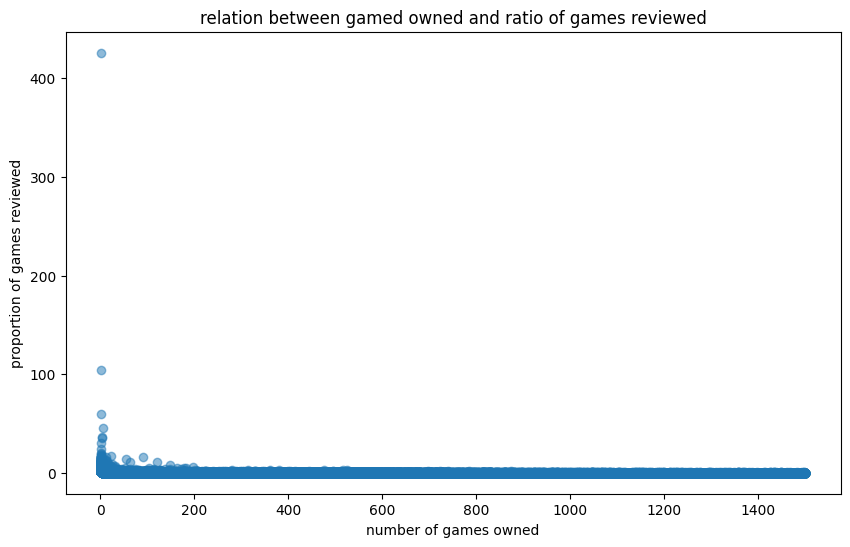

Pearson's correlation coefficient (log): -0.6997465743795502
Pearson's p-value (log): 0.0
Spearman's correlation coefficient (log): -0.7750410937232216
Spearman's p-value (log): 0.0


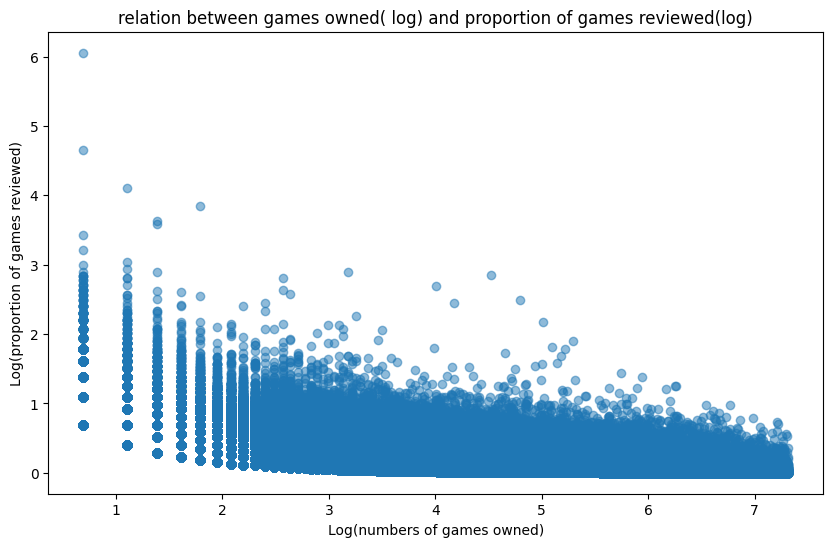

In [65]:
df_copy = df.copy()

#removes missing values
df_clean = df_copy[['author.steamid', 'author.num_games_owned', 'author.num_reviews']].dropna()

#takes only the reasonables values
max_games_threshold = 1500
max_reviews_threshold = 1500

df_clean = df_clean[
    (df_clean['author.num_games_owned'] <= max_games_threshold) &
    (df_clean['author.num_reviews'] <= max_reviews_threshold)
]

# group ny steam ID and takes only the max values for each user 
author_data = df_clean.groupby('author.steamid').agg({
    'author.num_games_owned': 'max',
    'author.num_reviews': 'max'
}).reset_index()

#calculates the proportion of games reviewed on games owned
author_data['proportion_reviewed'] = author_data['author.num_reviews'] / author_data['author.num_games_owned']
#remove missing values
author_data = author_data.replace([np.inf, -np.inf], np.nan).dropna(subset=['proportion_reviewed'])

#calculates the correlations
pearson_corr, pearson_p = pearsonr(author_data['author.num_games_owned'], author_data['proportion_reviewed'])
spearman_corr, spearman_p = spearmanr(author_data['author.num_games_owned'], author_data['proportion_reviewed'])

print(f"Pearson correlation coefficient: {pearson_corr}")
print(f"Pearson p-value: {pearson_p}")
print(f"Spearman correlation coefficient: {spearman_corr}")
print(f"Spearman p-value: {spearman_p}")

# plot
plt.figure(figsize=(10, 6))
plt.scatter(author_data['author.num_games_owned'], author_data['proportion_reviewed'], alpha=0.5)
plt.xlabel('number of games owned')
plt.ylabel('proportion of games reviewed')
plt.title('relation between gamed owned and ratio of games reviewed')
plt.show()



#log transformation
author_data['log_num_games_owned'] = np.log1p(author_data['author.num_games_owned'])
author_data['log_proportion_reviewed'] = np.log1p(author_data['proportion_reviewed'])

#correlation 
pearson_corr_log, pearson_p_log = pearsonr(author_data['log_num_games_owned'], author_data['log_proportion_reviewed'])
spearman_corr_log, spearman_p_log = spearmanr(author_data['log_num_games_owned'], author_data['log_proportion_reviewed'])

#display the results
print(f"Pearson's correlation coefficient (log): {pearson_corr_log}")
print(f"Pearson's p-value (log): {pearson_p_log}")
print(f"Spearman's correlation coefficient (log): {spearman_corr_log}")
print(f"Spearman's p-value (log): {spearman_p_log}")

#display the plot
plt.figure(figsize=(10, 6))
plt.scatter(author_data['log_num_games_owned'], author_data['log_proportion_reviewed'], alpha=0.5)
plt.xlabel('Log(numbers of games owned)')
plt.ylabel('Log(proportion of games reviewed)')
plt.title('relation between games owned( log) and proportion of games reviewed(log)')
plt.show()


the results indicate a significant negative correlation between the number of games owned by reviewers and the proportion of games they review. In particular, the pearson correlation coefficient (who  measures the linear relationship between two variables) is equal to -0.2456 with a p-value of 0, while the spearman correlation coefficient (who measures the monotonic relationship between two variables) is -0.7750 with a p-value of 0. These values ​​suggest that as the number of games owned increases, the percentage of games reviewed tends to decrease.
The difference between the two correlation coefficients is notable: the Spearman coefficient indicates a stronger negative monotonic relationship than the linear one measured by the Pearson coefficient. This may be because the relationship between the variables is not strictly linear, but there is still a clear trend that reviewers with larger game libraries review proportionately fewer.

After applying logarithmic transformation to the data, the results show an even stronger negative correlation. The Pearson correlation coefficient become -0.6997, maintaining a p-value of 0, while the Spearman coefficient remains unchanged at -0.7750. The logarithmic transformation reduced the effect of outliers and highlighted a stronger relationship between the variables. This strengthens the evidence that there is a significant negative relationship between the number of games owned and the proportion of games reviewed.

This analysis supports the hypothesis that reviewers who own more games tend to leave reviews on a smaller percentage of their games than those who own fewer. The reason could be that users with large game libraries spend less time on each title individually or are less motivated to share their thoughts for each game. On the other hand, those who own fewer games may be more engaged with each title and therefore more likely to write reviews.

***Ask an LLM tool (such as ChatGPT, Claude AI, Gemini, Perplexity, etc.) to understand the purposes of histograms, bar plots, scatterplots, and pie charts and what kind of insights they offer that might be useful for statistical analysis.***

The different types of charts mentioned serve specific purposes in statistical analysis and each offers unique and valuable insights for understanding data.

Histograms are fundamental for visualizing the distribution of continuous variables. They allow you to observe the shape of the distribution, identify the mode (unimodal, bimodal, multimodal), assess symmetry, and detect potential outliers. In statistical analysis, histograms are particularly useful for checking the normality of the distribution, an important assumption for many statistical tests. Additionally, they help identify hidden patterns in the data, such as the presence of subgroups or anomalies in the distribution.

Bar charts are ideal for comparing discrete categories or groups. They are particularly effective when you want to compare quantities between different categories or show the evolution of a variable over time. In statistical analysis, bar charts enable you to quickly identify significant differences between groups, dominant trends, and relationships between categorical variables. They can also be used to visualize relative or absolute frequencies, facilitating comparisons between proportions.

Scatterplots are essential for examining the relationship between two continuous variables. They allow you to visualize correlation, identify linear or non-linear patterns, and detect clusters or outliers. In statistical analysis, scatterplots are fundamental for evaluating the strength and direction of relationships between variables, identifying possible causal relationships, and checking linearity assumptions for regression models. They can also reveal complex patterns that might not be evident through simple correlation coefficients.

Pie charts are useful for visualizing relative proportions within a whole. They are particularly effective when you want to show how different parts contribute to a total and are ideal for representing percentages or fractions. In statistical analysis, pie charts help understand the composition of a dataset, identify dominant proportions, and effectively communicate the relative distribution among categories. They are especially useful when you want to emphasize the part relative to the whole.

Each type of chart offers unique perspectives for exploratory data analysis:

	•	Histograms reveal the nature of the data distribution.
	•	Bar charts facilitate comparisons between discrete groups.
	•	Scatterplots show relationships and patterns among continuous variables.
	•	Pie charts highlight proportional composition.

The choice of the appropriate chart type depends on the nature of the data and the insights you want to obtain. A comprehensive statistical analysis often benefits from the combined use of different visualizations, as each can reveal different and complementary aspects of the underlying data.

Understanding the strengths and limitations of each type of visualization is crucial for proper statistical analysis. While histograms and scatterplots are more suited for technical analysis and identifying statistical patterns, bar charts and pie charts are often more effective for communicating results to a non-technical audience.

***Are those results trustworthy, or can you do something to improve somehow the confidence in the suggestions given by the LLM?***

The responses provided by the LLM can generally be reliable, but there are some considerations to keep in mind to improve confidence. It’s important to verify information with external sources, such as scientific articles or statistical manuals, to confirm the validity of the claims made about the use of charts and their applications. Applying the suggested techniques to real data and comparing the results with expectations can reveal the effectiveness of the described visualizations. Finally, consulting different language models can help identify any inconsistencies or limitations in the responses. Taking these measures can increase confidence in the information received from the LLM and ensure a more robust analysis.

### ***BONUS*** ###

***Perform sentiment analysis on the review texts in the top 3 languages and classify them as positive, negative, or neutral.***

We already identified the top 3 languages: english, chinese and russian.

In order to perform the sentiment analysis we are going to use different packages for each language:

english-> textblob
chinese-> snownlp
russian-> XLM-Roberta (a multilingual model)

In [29]:
#install TextBlob 
!pip install textblob

#install SnowNLPs
!pip install snownlp

#install XLM-Roberta
!pip install transformers



In [30]:
from textblob import TextBlob
from snownlp import SnowNLP
from transformers import XLMRobertaTokenizer, XLMRobertaForSequenceClassification
import torch

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


english sentiment function

In [31]:
def classify_sentiment_english(text):
    analysis = TextBlob(text)
    polarity_en = analysis.sentiment.polarity
    if polarity_en > 0.05:
        return 'Positive'
    elif polarity_en < -0.05:
        return 'Negative'
    else:
        return 'Neutral'


chinese sentiment function

In [32]:

def classify_sentiment_chinese(text):
    s = SnowNLP(text)
    polarity_ch = s.sentiments 
    if polarity_ch > 0.6:
        return 'Positive'
    elif polarity_ch < 0.4:
        return 'Negative'
    else:
        return 'Neutral'


russian sentiment function

In [33]:


# Load the model and tokenizer
model_name = 'cardiffnlp/twitter-xlm-roberta-base-sentiment'
tokenizer = XLMRobertaTokenizer.from_pretrained(model_name)
model = XLMRobertaForSequenceClassification.from_pretrained(model_name)

def classify_sentiment_ru(text):
    # Encode the text
    inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=512)
    # Get the model's output
    outputs = model(**inputs)
    # Apply softmax to get probabilities
    probs = torch.nn.functional.softmax(outputs.logits, dim=-1)
    sentiment = torch.argmax(probs).item()
    # Map to sentiment labels
    sentiment_map = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}
    return sentiment_map[sentiment]

In [35]:
#define the top3languages
top_languages = ['english', 'schinese', 'russian']

#filter the dataset bu languages
df_top_lang = df[df['language'].isin(top_languages)].copy()
#remove rows where review is nan, we are not interested in these
df_top_lang = df_top_lang[df_top_lang['review'].notna()].copy()
#ensure all reviews are strings
df_top_lang['review'] = df_top_lang['review'].astype(str)

df_top_lang.reset_index(drop=True, inplace=True)
#function to classify sentiment on language
def classify_sentiment(row):
    text = row['review']
    lang = row['language']
    if lang == 'english':
        return classify_sentiment_english(text)
    elif lang == 'schinese':
        return classify_sentiment_chinese(text)
    elif lang == 'russian':
        return classify_sentiment_ru(text)
    else:
        return 'Language not supported'

#apply sentiment analysis to the filtered dataset
df_top_lang['sentiment'] = df_top_lang.apply(classify_sentiment, axis=1)

# Display the results
print(df_top_lang[['review', 'language', 'sentiment']])


KeyboardInterrupt: 

We attempted to run this code,even using the chuncks, but after 7 hours we stopped it.

So we will keep it because we think it's the right approach,but from now on we'll focus only on english reviews.

In [36]:
#filter to only english reviews
df_english = df[df['language'] == 'english'].copy()
df_english = df_english[df_english['review'].notna()].copy()
df_english['review'] = df_english['review'].astype(str)
df_english.reset_index(drop=True, inplace=True)


In [44]:
def categorize_sentiment(polarity):
    if polarity > 0.1:
        return 'Positive'
    elif polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

In [45]:
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

chunks = 50000  
sentiment_scores = []
sentiment_categories = []

for start in range(0, len(df_english), chunks):
    end = min(start + chunks, len(df_english))
    chunk = df_english.iloc[start:end]
    chunk['sentiment'] = chunk['review'].apply(get_sentiment)
    chunk['sentiment_category'] = chunk['sentiment'].apply(categorize_sentiment)
    sentiment_scores.append(chunk['sentiment'])
    sentiment_categories.append(chunk['sentiment_category'])


/var/folders/wn/p0ly0k3d76955wlp0s0hqndw0000gn/T/ipykernel_15385/1229666005.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['sentiment'] = chunk['review'].apply(get_sentiment)
/var/folders/wn/p0ly0k3d76955wlp0s0hqndw0000gn/T/ipykernel_15385/1229666005.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['sentiment_category'] = chunk['sentiment'].apply(categorize_sentiment)
/var/folders/wn/p0ly0k3d76955wlp0s0hqndw0000gn/T/ipykernel_15385/1229666005.py:12: SettingWithCopyWarning: 
A value is 

In [46]:
df_english['sentiment'] = pd.concat(sentiment_scores).reset_index(drop=True)
df_english['sentiment_category'] = pd.concat(sentiment_categories).reset_index(drop=True)


sentiment_category
Positive    4632420
Neutral     3772480
Negative    1213781
Name: count, dtype: int64
sentiment_category
Positive   48.16
Neutral    39.22
Negative   12.62
Name: proportion, dtype: float64


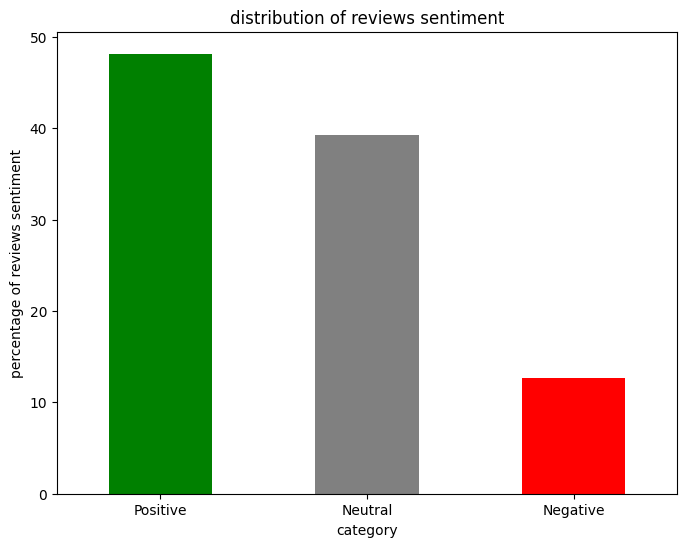

In [48]:
#calculate the number for each category
sentiment_counts = df_english['sentiment_category'].value_counts()
print(sentiment_counts)
#calculate the percentages
sentiment_percentages = df_english['sentiment_category'].value_counts(normalize=True) * 100
print(sentiment_percentages)
#plot
plt.figure(figsize=(8,6))
sentiment_percentages.plot(kind='bar', color=['green', 'gray', 'red'])
plt.title('distribution of reviews sentiment')
plt.xlabel('category')
plt.ylabel('percentage of reviews sentiment')
plt.xticks(rotation=0)
plt.show()




***Does the sentiment analysis align with whether the application is recommended or not? Explain any insights from this comparison***

reviews score counts:
recommended
True     8568121
False    1050560
Name: count, dtype: int64

reviews score percentages:
recommended
True    89.08
False   10.92
Name: count, dtype: float64


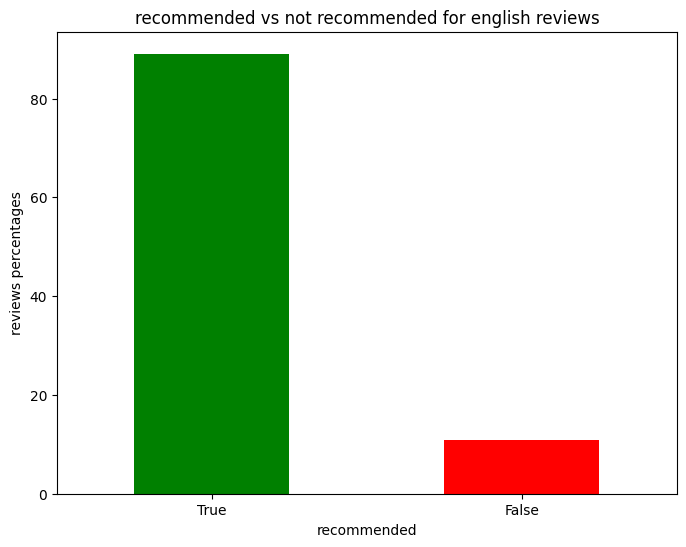

In [51]:
recommendation_counts_en = df_english['recommended'].value_counts()
print("reviews score counts:")
print(recommendation_counts_en)
recommendation_counts.index = recommendation_counts_en.index.map({True: 'recommended', False: 'not recommended '})

#calculate the percentages
total_reviews = recommendation_counts_en.sum()
recommendation_percentages_en = (recommendation_counts_en / total_reviews) * 100
print("\nreviews score percentages:")
print(recommendation_percentages_en)

# barplot
plt.figure(figsize=(8,6))
recommendation_percentages_en.plot(kind='bar', color=['green', 'red'])
plt.title('recommended vs not recommended for english reviews')
plt.ylabel('reviews percentages')
plt.xticks(rotation=0)
plt.show()

Both graphs indicate that the majority of reviews are perceived positively or at least not negatively. This is evident from the high percentage of recommended reviews and the predominance of positive and neutral sentiments, suggesting an overall high level of user satisfaction.

In the recommended reviews graph, approximately 89% of reviews are recommended, while in the sentiment distribution graph, around 48% of reviews are classified as "positive." Both graphs therefore suggest that most reviews are viewed positively, whether in terms of recommendation or sentiment.

Additionally, in the recommended reviews graph, 10.92% of reviews are not recommended, while in the sentiment graph, 12.62% of reviews are negative. This suggests that not recommended reviews tend to be associated with negative sentiment, demonstrating a consistency between ratings expressed in terms of recommendation and sentiment.

We can thus infer that many reviews categorized as "Neutral" were still included among the recommended reviews. Furthermore, we see that the percentage of not recommended reviews is slightly lower than that of negative reviews. This indicates that some recommended reviews were categorized as "negative" in the sentiment analysis. This difference in percentages is consistent, given that the dataset filtered for english language reviews is the same in both analyses.

***Is there a correlation between the sentiment of a review and the number of helpfulness votes it receives? Provide an analysis of the results and discuss potential trends.***

Pearson correlation coefficient: -0.10511709231148611, p-value: 0.0
Spearman correlation coefficient: -0.10072711202346164, p-value: 0.0


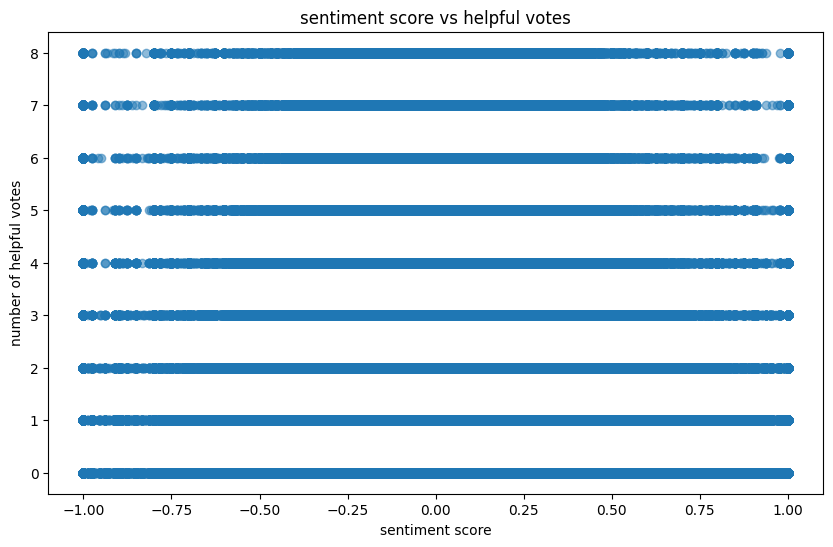

In [58]:
df_analysis = df_english[['sentiment', 'votes_helpful']].dropna()
#remove outliers 99th percentile
percentile99 = df_english['votes_helpful'].quantile(0.99)
df_analysis = df_english[df_english['votes_helpful'] <= percentile99]


#calculate pearson's correlation coefficient
pearson_corr, pearson_p = pearsonr(df_analysis['sentiment'], df_analysis['votes_helpful'])
print(f"Pearson correlation coefficient: {pearson_corr}, p-value: {pearson_p}")

#calculate Spearman's correlation
spearman_corr, spearman_p = spearmanr(df_analysis['sentiment'], df_analysis['votes_helpful'])
print(f"Spearman correlation coefficient: {spearman_corr}, p-value: {spearman_p}")

plt.figure(figsize=(10, 6))
plt.scatter(df_analysis['sentiment'], df_analysis['votes_helpful'], alpha=0.5)
plt.title('sentiment score vs helpful votes')
plt.xlabel('sentiment score')
plt.ylabel('number of helpful votes')
plt.show()



The Pearson correlation coefficient is -0.105, while the Spearman correlation coefficient is approximately -0.101. These values are quite low, indicating a very weak negative relationship between sentiment scores and helpful votes, which is significant due to the low p-value. The sentiment scores range from -1 to 1, but the distribution of helpful votes seems largely unaffected by these scores. For instance, both positive and negative sentiment reviews exhibit similar distributions of helpful votes, suggesting there is no clear linear relationship between sentiment and helpfulness. 
We can conclude that sentiment alone doesn't serve as a strong predictor of helpful votes on Steam reviews, this is quite logical to predict as both positive and negative reviews can be useful for a user who wants to approach the game.

### ***Algorithmic Question (AQ)***


***Implement a Python program to solve the problem above***

In [ ]:
t=0
while not(1<=t<=100):
   t = int(input()) # enter a valid t value as a number of test cases, otherwise re-enter
   
results = []
for _ in range(t):
    n,k = map(int, input().split()) # test case
    if 1<=n<=10**9 and 1<=k<=100: # n and k constraints
        if n<k: 
            results.append("NO")
        elif n%k==0: # if n is a multiple of k
            results.append("YES")
            results.append(" ".join(map(str, [n//k]*k)))
        elif n%2==0:
            if k%2==1:
                if k>=n/2:
                    results.append("NO")
                else:
                    results.append("YES")
                    results.append(" ".join(map(str, [2]*(k-1)+[n-2*(k-1)])))
            elif k%2==0:
                    results.append("YES")
                    results.append(" ".join(map(str, [1]*(k-1)+[n-(k-1)])))
        elif n%2==1:
            if k%2==1:
                results.append("YES")
                results.append(" ".join(map(str, [1]*(k-1)+[n-(k-1)])))
            elif k%2==0:
                results.append("NO")
    else:
        results.append("NO")


for result in results:
    print(result)

***Please provide an analysis of your code's time complexity using Big O notation.***

for avoiding ambiguity, 'n' will stand as the variable used in the code and to indicate linear complexity, instead of writing O(n) we'll write O(m)

The first loop:

    *while not(1<=t<=100)*

has a complexity of O(m), where m is the number of times a wrong value is entered before a correct t is provided, because:

-in the best case, we enter immediately a value of t between 1 and 100 (both included)

-in the worst case, we enter a right value of t, after entering m times a wrong value

The second loop (for):

    *for _ in range(t)*
has a complexity of O(m) because:

-we'll iterate for t times but t is a constant (between 1 and 100), and the costants asymptotically hold O(1)
-every condition (if/elif/else) have a complexity of O(1)

    *results.append(" ".join(map(str, [1]*(k-1)+[n-(k-1)])))*

    *results.append(" ".join(map(str, [2]*(k-1)+[n-2*(k-1)])))*
    
->theese two lines have both O(m) of complexity because:
-the map() funcion has a complexity of O(k)
-the join() function has a complexity of O(m), where m is equal to k + all the spaces added between each two values
-the functions are not nested (despite the python syntax)

The third loop (for):
    *for result in results*

it iterates m times where m is the number of the element in the results list, so the complexity is O(m)

Thus in conclusion the algorithm complexity is O(m), so linear.

***Ask an LLM tool (such as ChatGPT, Claude AI, Gemini, Perplexity, etc.) to evaluate the time complexity of your code using Big O notation. Is the assessment accurate? If it differs from your previous analysis, which would be correct? Please explain your reasoning.***

The response from Copilot was similar to ours. For him, too, the algorithm is linear but for different reasons: in our opinion it is because of the map function while in his opinion it is because of the "for _ in range(t)". In fact we wrote complexity O(m) while he wrote O(t). Personally we consider his assessment wrong since t is considerable as a constant. He also does not take the slightest account of the (not insignificant) complexity that many of python's functions hide.

***we also will add another solution with the help of an LLM tool to the algoritmic question.***

In [ ]:
def solve_cases(t, test_cases):
    results = []
    for case in test_cases:
        n, k = case
        #check for odd numbers solution
        if n >= k and (n % 2 == k % 2):
            results.append("YES")
            #construct k odd numbers
            results.append("1 " * (k - 1) + str(n - (k - 1)))
        #check for even numbers solution
        elif n >= 2 * k and (n % 2 == 0):
            results.append("YES")
            #construct k even numbers
            results.append("2 " * (k - 1) + str(n - 2 * (k - 1)))
        else:
            results.append("NO")
    return results

#input reading
t = int(input())
test_cases = [tuple(map(int, input().split())) for _ in range(t)]
#solve cases
results = solve_cases(t, test_cases)
#output results
for result in results:
    print(result)

The code starts by validating the number of test cases  t , ensuring it’s between 1 and 100, which has a constant complexity  O(1) .

The main part of the code iterates  t  times, once for each test case, giving an  O(t)  complexity for the outer loop. Within each iteration, various  O(1)  condition checks determine whether  n  can be represented as the sum of  k  integers of the same parity.

When a valid solution is found, the code constructs an output list with  k  elements, resulting in  O(k)  operations for that step. The final print statements iterate over  t  results, which adds an  O(t)  complexity to the output phase.

Total Complexity
Thus, the overall time complexity is  $O(t \cdot k)$ , which is efficient for the given constraints, as both  t  and  k  are capped at 100, ensuring optimal performance even in the worst cases.

The assessment of the complexity has proven to be consistent with ours.
The complexity assessment proved to be consistent with ours because both analyses highlight that the code iterates through a limited number of test cases, with a maximum of 100, and within each test case, it performs constant operations. The control conditions implemented in the loop all have a complexity of O(1), meaning they do not significantly affect the total execution time.
This leads to an overall complexity that can be expressed as $O(t \cdot k)$, where t represents the number of tests and k represents the number of elements to be summed.